# Restaurant Recommendation System

## Install the required modules

In [ ]:
pip install warnings

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings


In [ ]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


## Import the modules

In [1]:
# warnings.filterwarnings('ignore')
# this will allow ploting inside the notebook
%matplotlib inline
import gc # garbage collector
import numpy as np # linear algebra
from collections import Counter # for counting commong words
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualization
plt.style.use('fivethirtyeight') # use ggplot ploting style
import seaborn as sns # visualization 
from wordcloud import WordCloud, STOPWORDS # this module is for making wordcloud in python
import re # regular expression
import string # for finding punctuation in text
import nltk # preprocessing text
from textblob import TextBlob
#import ploty for visualization
import plotly
import plotly.offline as py # make offline 
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.graph_objs import *
import plotly.tools as tls
import plotly.figure_factory as fig_fact
# plotly.tools.set_config_file(world_readable=True, sharing='public')

## Data Preprocessing

#### Read business.csv file

In [2]:
bu_df = pd.read_csv('csv/yelp_business.csv')
bu_df.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [5]:
print("In total we have", bu_df.shape[0], "businesses.")

In total we have 174567 businesses.


#### To show number of open and closed businesses

In [6]:
op = bu_df.groupby('is_open').business_id.count()
op

is_open
0     27865
1    146702
Name: business_id, dtype: int64

#### To plot a bar graph to show the total number of open and closed businesses

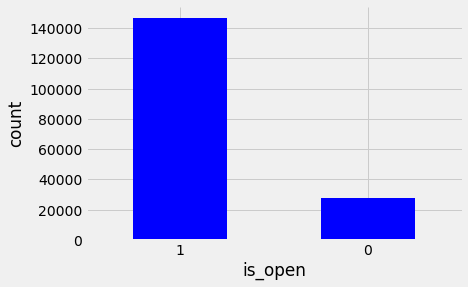

In [ ]:
bu_df.is_open.value_counts(dropna=False).plot(kind='bar',color='blue', rot=0)
plt.xlabel('is_open')
plt.ylabel('count')
sns.despine()

#### Drop the rows(businesses) which are closed

In [ ]:
bu_df.drop(bu_df[bu_df.is_open == 0].index, inplace=True)
bu_df.head(200)

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...
5,o9eMRCWt5PkpLDE0gOPtcQ,"""Messina""",NaN,"""Richterstr. 11""",Stuttgart,BW,70567,48.727200,9.147950,4.0,5,1,Italian;Restaurants
...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,zF7HHlWxhgpaO4IVmaNeag,"""Check, Please Arizona Festival""",NaN,"""One E Washington""",Phoenix,AZ,85004,33.448428,-112.073177,4.0,5,1,Arts & Entertainment;Yelp Events;Festivals;Loc...
228,aD4qhONCE5catMdQC4sqwg,"""Reginos Pizza""",Upper Beach,"""3331 Danforth Avenue""",Scarborough,ON,M1L 1C5,43.686836,-79.293838,3.5,10,1,Restaurants;Pizza
230,lXGx_aKtF_UxenWDDkogWg,"""Northern Karate School""",NaN,"""756 St Clair Avenue W""",Toronto,ON,M6C 1B5,43.681432,-79.428377,4.0,6,1,Active Life;Sporting Goods;Karate;Education;Sh...
231,c1HfT-Rm4iYSxsAsk8eW4Q,"""Cleveland Dog Walk""",Ohio City,"""""",Cleveland,OH,44113,41.485710,-81.696631,5.0,5,1,Pet Services;Pet Sitting;Dog Walkers;Pets


In [ ]:
bu1.drop('attributes', axis = 1, inplace = True)
bu1.drop('hours', axis = 1, inplace = True)
bu1

,RestaurantsTableService,WiFi,BusinessAcceptsCreditCards,RestaurantsReservations,WheelchairAccessible,Caters,OutdoorSeating,RestaurantsGoodForGroups,HappyHour,BusinessAcceptsBitcoin,...,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,True,u'free',True,False,True,True,True,True,True,False,...,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"Gastropubs, Food, Beer Gardens, Restaurants, B..."
1,NaN,u'free',True,False,NaN,True,False,False,NaN,NaN,...,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"Salad, Soup, Sandwiches, Delis, Restaurants, C..."
2,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"Antiques, Fashion, Used, Vintage & Consignment..."
3,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"Beauty & Spas, Hair Salons"
4,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"Gyms, Active Life, Interval Training Gyms, Fit..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160578,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6629 E Colonial Dr,Orlando,FL,32807,28.566161,-81.298123,4.5,8,1,"Automotive, Tires, Towing, Auto Repair"
160579,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29 Greenwood Ave,Needham,MA,02492,42.282399,-71.225169,1.0,11,1,"Automotive, Auto Detailing"
160580,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,,Austin,TX,78701,30.272921,-97.744386,4.0,8,1,"Real Estate, Real Estate Services, Home Servic..."
160581,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21777 State Rd 520,Orlando,FL,32833,28.499836,-81.047478,4.5,18,1,"Health Markets, Food, Specialty Food, Grocery"


#### Save businesses to new csv file

In [ ]:
bu_df.to_csv('csv/bu_new1.csv')
bu_df.to_json('csv/bu_new1.json')

In [ ]:
import pandas as pd
bu1=pd.read_csv('csv/bu_new1.csv')
bu1.drop('Unnamed: 0',axis=1,inplace= True)
bu1

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...
4,o9eMRCWt5PkpLDE0gOPtcQ,"""Messina""",NaN,"""Richterstr. 11""",Stuttgart,BW,70567,48.727200,9.147950,4.0,5,1,Italian;Restaurants
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146697,ALV5R8NkZ1KGOZeuZl3u0A,"""Whitby Toyota""",NaN,"""1025 Dundas Street W""",Whitby,ON,L1P 1Z1,43.873460,-78.968033,4.0,4,1,Car Dealers;Automotive
146698,gRGalHVu6BcaUDIAGVW_xQ,"""Village Auto Body""",NaN,"""3957 Brecksville Rd""",Richfield,OH,44286,41.243385,-81.636212,5.0,3,1,Body Shops;Automotive
146699,XXvZBIHoJBU5d6-a-oyMWQ,"""AAM""",NaN,"""1600 W Broadway Rd, Ste 200""",Tempe,AZ,85282,33.407914,-111.965098,1.5,19,1,Home Services;Property Management;Real Estate
146700,lNpPGgM96nPIYM1shxciHg,"""Bronze Beauty Spray Tanning""",NaN,"""300 Camp Horne Rd, Ste 250""",Pittsburgh,PA,15202,40.517724,-80.091466,5.0,14,1,Spray Tanning;Tanning;Beauty & Spas


#### List of categories

In [ ]:
bu1.categories

0         Dentists;General Dentistry;Health & Medical;Or...
1         Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2         Departments of Motor Vehicles;Public Services ...
3         American (New);Nightlife;Bars;Sandwiches;Ameri...
4                                       Italian;Restaurants
                                ...                        
146697                               Car Dealers;Automotive
146698                                Body Shops;Automotive
146699        Home Services;Property Management;Real Estate
146700                  Spray Tanning;Tanning;Beauty & Spas
146701                 Drugstores;Shopping;Health & Medical
Name: categories, Length: 146702, dtype: object

In [ ]:
l=[]
x = bu1['categories'].str.split(';')

for i in range(len(x)):
    for j in x[i]:
        l.append(j)
print(len(l))
print(len(set(l)))

571134
1287


#### Split the categories into different fields

In [ ]:
# categories column has many categories at once. Let's split the categories column and store each category in it's own column
df_category_split = bu1['categories'].str.split(';', expand=True)[[0,1,2,3,4,5,6,7,8,9]]
# rename the new columns
df_category_split.columns = ['category1', 'category2', 'category3', 'category4', 'category5', 'category6', 'category7', 'category8', 'category9', 'category10']
business = pd.concat([bu1, df_category_split], axis=1)
# now drop the actual categories column
business = business.drop(['categories'], axis=1)
# print the head of the dataset
business.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,...,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,...,Dentists,General Dentistry,Health & Medical,Oral Surgeons,Cosmetic Dentists,Orthodontists,None,None,None,None
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,...,Hair Stylists,Hair Salons,Men's Hair Salons,Blow Dry/Out Services,Hair Extensions,Beauty & Spas,None,None,None,None
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,...,Departments of Motor Vehicles,Public Services & Government,None,None,None,None,None,None,None,None
3,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,...,American (New),Nightlife,Bars,Sandwiches,American (Traditional),Burgers,Restaurants,None,None,None
4,o9eMRCWt5PkpLDE0gOPtcQ,"""Messina""",NaN,"""Richterstr. 11""",Stuttgart,BW,70567,48.727200,9.147950,4.0,...,Italian,Restaurants,None,None,None,None,None,None,None,None


In [ ]:
business_cat=business[['category1', 'category2', 'category3', 'category4', 'category5', 'category6', 'category7', 'category8', 'category9', 'category10']]

business_cat

,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10
0,Dentists,General Dentistry,Health & Medical,Oral Surgeons,Cosmetic Dentists,Orthodontists,None,None,None,None
1,Hair Stylists,Hair Salons,Men's Hair Salons,Blow Dry/Out Services,Hair Extensions,Beauty & Spas,None,None,None,None
2,Departments of Motor Vehicles,Public Services & Government,None,None,None,None,None,None,None,None
3,American (New),Nightlife,Bars,Sandwiches,American (Traditional),Burgers,Restaurants,None,None,None
4,Italian,Restaurants,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
146697,Car Dealers,Automotive,None,None,None,None,None,None,None,None
146698,Body Shops,Automotive,None,None,None,None,None,None,None,None
146699,Home Services,Property Management,Real Estate,None,None,None,None,None,None,None
146700,Spray Tanning,Tanning,Beauty & Spas,None,None,None,None,None,None,None


#### Cuisine types

In [ ]:
business_type = ' Restaurants','Restaurants',' Food','Food' ,' Pizza', 'Pizza', 'Mexican',' Mexican','American (Traditional)', ' American (Traditional)', 'American (New)', ' American (New)', 'Italian', ' Italian', 'Indian', ' Indian', 'Pakistani', ' Pakistani', 'Thai', ' Thai', 'Japanese', ' Japanese', 'French', ' French', 'Canadian (New)', ' Canadian (New)', 'Middle Eastern', ' Middle Eastern', 'German', ' German', 'Vietnamese', ' Vietnamese', 'Chinese', ' Chinese','Hungarian', ' Hungarian'                                                  

business_type

(' Restaurants',
 'Restaurants',
 ' Food',
 'Food',
 ' Pizza',
 'Pizza',
 'Mexican',
 ' Mexican',
 'American (Traditional)',
 ' American (Traditional)',
 'American (New)',
 ' American (New)',
 'Italian',
 ' Italian',
 'Indian',
 ' Indian',
 'Pakistani',
 ' Pakistani',
 'Thai',
 ' Thai',
 'Japanese',
 ' Japanese',
 'French',
 ' French',
 'Canadian (New)',
 ' Canadian (New)',
 'Middle Eastern',
 ' Middle Eastern',
 'German',
 ' German',
 'Vietnamese',
 ' Vietnamese',
 'Chinese',
 ' Chinese',
 'Hungarian',
 ' Hungarian')

#### Filter the businesses based on cuisine types

In [ ]:
food = business.loc[(business['category1'].isin(business_type)) | (business['category2'].isin(business_type)) | (business['category3'].isin(business_type)) | (business['category4'].isin(business_type)) | (business['category5'].isin(business_type)) | (business['category6'].isin(business_type)) | (business['category7'].isin(business_type)) | (business['category8'].isin(business_type)) | (business['category9'].isin(business_type)) | (business['category10'].isin(business_type))]
food

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,...,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10
3,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,...,American (New),Nightlife,Bars,Sandwiches,American (Traditional),Burgers,Restaurants,None,None,None
4,o9eMRCWt5PkpLDE0gOPtcQ,"""Messina""",NaN,"""Richterstr. 11""",Stuttgart,BW,70567,48.727200,9.147950,4.0,...,Italian,Restaurants,None,None,None,None,None,None,None,None
7,EsMcGiZaQuG1OOvL9iUFug,"""Any Given Sundae""",NaN,"""2612 Brandt School Rd""",Wexford,PA,15090,40.615102,-80.091349,5.0,...,Coffee & Tea,Ice Cream & Frozen Yogurt,Food,None,None,None,None,None,None,None
10,xcgFnd-MwkZeO5G2HQ0gAQ,"""T & T Bakery and Cafe""",Markham Village,"""35 Main Street N""",Markham,ON,L3P 1X3,43.875177,-79.260153,4.0,...,Bakeries,Bagels,Food,None,None,None,None,None,None,None
12,fNMVV_ZX7CJSDWQGdOM8Nw,"""Showmars Government Center""",Uptown,"""600 E 4th St""",Charlotte,NC,28202,35.221647,-80.839345,3.5,...,Restaurants,American (Traditional),None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146681,pUhU5ohYv65g8B47dTXAKA,"""Starbucks""",NaN,"""591 N Eastern Ave, Ste 110""",Las Vegas,NV,89101,36.173589,-115.116779,2.5,...,Coffee & Tea,Food,None,None,None,None,None,None,None,None
146684,FxtrmM1a_0jcNnxiEF_Emg,"""Badgarten""",NaN,"""Mühlstr. 36""",Ludwigsburg,BW,71640,48.898590,9.201470,3.0,...,Restaurants,Beer Garden,None,None,None,None,None,None,None,None
146691,yJH_gq99aEj8xtyBaAQH8Q,"""Otto Onkel""",NaN,"""Böblinger Str. 14""",Stuttgart,BW,70178,48.764212,9.166086,3.0,...,German,Restaurants,None,None,None,None,None,None,None,None
146693,UdEmYOnk2iJDY9lpEPAlJQ,"""Floridino's Pizza & Pasta""",NaN,"""590 N Alma School Rd, Ste 35""",Chandler,AZ,85224,33.311383,-111.859604,4.0,...,Pizza,Event Planning & Services,Italian,Caterers,Restaurants,None,None,None,None,None


#### Count of the food businesses wrt to states

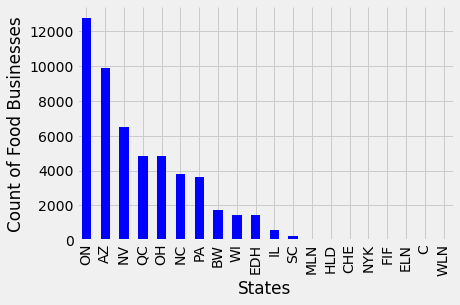

In [ ]:
food.state.value_counts(dropna=False)[0:20].plot(kind='bar',color='blue')
plt.ylabel('Count of Food Businesses')
plt.xlabel('States')
sns.despine()

In [ ]:
food.state.value_counts()

ON     12768
AZ      9908
NV      6493
QC      4864
OH      4811
NC      3818
PA      3636
BW      1725
WI      1456
EDH     1452
IL       573
SC       213
MLN       96
HLD       71
CHE       69
NYK       66
FIF       32
ELN       26
C         21
WLN       19
NY        12
01        10
ST         8
NI         7
VS         6
ESX        3
BY         3
XGL        2
CO         2
GLG        2
KHL        1
FLN        1
ABE        1
ZET        1
6          1
CA         1
30         1
RCC        1
VA         1
3          1
B          1
IN         1
WHT        1
AK         1
HU         1
PKN        1
Name: state, dtype: int64

#### Filter only those businesses with state ON
Since ON - Ontorio has the highest food business count, consider only that

In [ ]:
foodon = food.loc[food['state'].isin(['ON'])]
foodon

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,...,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10
10,xcgFnd-MwkZeO5G2HQ0gAQ,"""T & T Bakery and Cafe""",Markham Village,"""35 Main Street N""",Markham,ON,L3P 1X3,43.875177,-79.260153,4.0,...,Bakeries,Bagels,Food,None,None,None,None,None,None,None
16,Gu-xs3NIQTj3Mj2xYoN2aw,"""Maxim Bakery & Restaurant""",NaN,"""9665 Bayview Avenue, Unit 1-4""",Richmond Hill,ON,L4C 9V4,43.867565,-79.412662,3.5,...,French,Food,Bakeries,Restaurants,None,None,None,None,None,None
17,lHYiCS-y8AFjUitv6MGpxg,"""Starbucks""",Liberty Village,"""85 Hanna Avenue""",Toronto,ON,M6K 3S3,43.639863,-79.419533,4.0,...,Food,Coffee & Tea,None,None,None,None,None,None,None,None
21,1K4qrnfyzKzGgJPBEcJaNQ,"""Chula Taberna Mexicana""",Leslieville,"""1058 Gerrard Street E""",Toronto,ON,M4M 3A6,43.669256,-79.335902,3.5,...,Tiki Bars,Nightlife,Mexican,Restaurants,Bars,None,None,None,None,None
23,AtdXq_gu9NTE5rx4ct_dGg,"""DAVIDsTEA""",Ryerson,"""10 Dundas Street E""",Toronto,ON,M5B 2G9,43.656729,-79.380718,4.0,...,Coffee & Tea,Food,Tea Rooms,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146661,sEAKw3MZkER1u_1fzIeD3g,"""Gol Take-Out""",Willowdale,"""5 Spring Garden Avenue""",Toronto,ON,M2N 3G1,43.764386,-79.411206,4.0,...,Food,Restaurants,International Grocery,Ethnic Grocery,Persian/Iranian,None,None,None,None,None
146662,1HplwLVbBid-Bgw1sEPGFg,"""Dumpling Melody Bistro""",Etobicoke,"""3266 W Lake Shore Boulevard""",Toronto,ON,M8V 1M4,43.596858,-79.523305,2.0,...,Restaurants,Chinese,None,None,None,None,None,None,None,None
146674,fukaxeFh8W9ijOp8sCrDyA,"""Heritage Fish & Chips""",NaN,"""1 Fisherman Drive""",Brampton,ON,L7A 2X9,43.714303,-79.799411,4.0,...,Seafood,Restaurants,None,None,None,None,None,None,None,None
146680,nGjEV4bn0DPk8bcb0C6Aig,"""Sweet Serendipity Bake Shop""",The Danforth,"""1335 Danforth Avenue""",Toronto,ON,M4J 1N1,43.682054,-79.328996,4.5,...,Bakeries,Food,None,None,None,None,None,None,None,None


In [ ]:
foodon.columns[0:66]

Index(['business_id', 'name', 'neighborhood', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars', 'review_count',
       'is_open', 'category1', 'category2', 'category3', 'category4',
       'category5', 'category6', 'category7', 'category8', 'category9',
       'category10'],
      dtype='object')

#### Make the column values to lower case

In [ ]:
foodon['address'] = foodon.address.astype(str).str.lower()
foodon['name'] = foodon.name.astype(str).str.lower()
foodon['neighborhood'] = foodon.neighborhood.astype(str).str.lower()
foodon['city'] = foodon.city.astype(str).str.lower()
foodon['state'] = foodon.state.astype(str).str.lower()
foodon['category1'] = foodon.category1.astype(str).str.lower()
foodon['category2'] = foodon.category2.astype(str).str.lower()
foodon['category3'] = foodon.category3.astype(str).str.lower()
foodon['category4'] = foodon.category4.astype(str).str.lower()
foodon['category5'] = foodon.category5.astype(str).str.lower()
foodon['category6'] = foodon.category6.astype(str).str.lower()
foodon['category7'] = foodon.category7.astype(str).str.lower()
foodon['category8'] = foodon.category8.astype(str).str.lower()
foodon['category9'] = foodon.category9.astype(str).str.lower()
foodon['category10'] = foodon.category10.astype(str).str.lower()

In [ ]:
foodon

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,...,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10
10,xcgFnd-MwkZeO5G2HQ0gAQ,"""t & t bakery and cafe""",markham village,"""35 main street n""",markham,on,L3P 1X3,43.875177,-79.260153,4.0,...,bakeries,bagels,food,none,none,none,none,none,none,none
16,Gu-xs3NIQTj3Mj2xYoN2aw,"""maxim bakery & restaurant""",nan,"""9665 bayview avenue, unit 1-4""",richmond hill,on,L4C 9V4,43.867565,-79.412662,3.5,...,french,food,bakeries,restaurants,none,none,none,none,none,none
17,lHYiCS-y8AFjUitv6MGpxg,"""starbucks""",liberty village,"""85 hanna avenue""",toronto,on,M6K 3S3,43.639863,-79.419533,4.0,...,food,coffee & tea,none,none,none,none,none,none,none,none
21,1K4qrnfyzKzGgJPBEcJaNQ,"""chula taberna mexicana""",leslieville,"""1058 gerrard street e""",toronto,on,M4M 3A6,43.669256,-79.335902,3.5,...,tiki bars,nightlife,mexican,restaurants,bars,none,none,none,none,none
23,AtdXq_gu9NTE5rx4ct_dGg,"""davidstea""",ryerson,"""10 dundas street e""",toronto,on,M5B 2G9,43.656729,-79.380718,4.0,...,coffee & tea,food,tea rooms,none,none,none,none,none,none,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146661,sEAKw3MZkER1u_1fzIeD3g,"""gol take-out""",willowdale,"""5 spring garden avenue""",toronto,on,M2N 3G1,43.764386,-79.411206,4.0,...,food,restaurants,international grocery,ethnic grocery,persian/iranian,none,none,none,none,none
146662,1HplwLVbBid-Bgw1sEPGFg,"""dumpling melody bistro""",etobicoke,"""3266 w lake shore boulevard""",toronto,on,M8V 1M4,43.596858,-79.523305,2.0,...,restaurants,chinese,none,none,none,none,none,none,none,none
146674,fukaxeFh8W9ijOp8sCrDyA,"""heritage fish & chips""",nan,"""1 fisherman drive""",brampton,on,L7A 2X9,43.714303,-79.799411,4.0,...,seafood,restaurants,none,none,none,none,none,none,none,none
146680,nGjEV4bn0DPk8bcb0C6Aig,"""sweet serendipity bake shop""",the danforth,"""1335 danforth avenue""",toronto,on,M4J 1N1,43.682054,-79.328996,4.5,...,bakeries,food,none,none,none,none,none,none,none,none


#### Save the updated data into csv file

In [ ]:
foodon.to_csv('csv/foodon.csv')
foodon.to_json('csv/foodon.json')

In [ ]:
foodon.columns

Index(['business_id', 'name', 'neighborhood', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars', 'review_count',
       'is_open', 'category1', 'category2', 'category3', 'category4',
       'category5', 'category6', 'category7', 'category8', 'category9',
       'category10'],
      dtype='object')

In [ ]:
import pandas as pd

In [ ]:
foodon = pd.read_csv('csv/foodon.csv')
foodon.drop('Unnamed: 0',axis=1,inplace= True)
foodon

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,...,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10
0,xcgFnd-MwkZeO5G2HQ0gAQ,"""t & t bakery and cafe""",markham village,"""35 main street n""",markham,on,L3P 1X3,43.875177,-79.260153,4.0,...,bakeries,bagels,food,none,none,none,none,none,none,none
1,Gu-xs3NIQTj3Mj2xYoN2aw,"""maxim bakery & restaurant""",NaN,"""9665 bayview avenue, unit 1-4""",richmond hill,on,L4C 9V4,43.867565,-79.412662,3.5,...,french,food,bakeries,restaurants,none,none,none,none,none,none
2,lHYiCS-y8AFjUitv6MGpxg,"""starbucks""",liberty village,"""85 hanna avenue""",toronto,on,M6K 3S3,43.639863,-79.419533,4.0,...,food,coffee & tea,none,none,none,none,none,none,none,none
3,1K4qrnfyzKzGgJPBEcJaNQ,"""chula taberna mexicana""",leslieville,"""1058 gerrard street e""",toronto,on,M4M 3A6,43.669256,-79.335902,3.5,...,tiki bars,nightlife,mexican,restaurants,bars,none,none,none,none,none
4,AtdXq_gu9NTE5rx4ct_dGg,"""davidstea""",ryerson,"""10 dundas street e""",toronto,on,M5B 2G9,43.656729,-79.380718,4.0,...,coffee & tea,food,tea rooms,none,none,none,none,none,none,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12763,sEAKw3MZkER1u_1fzIeD3g,"""gol take-out""",willowdale,"""5 spring garden avenue""",toronto,on,M2N 3G1,43.764386,-79.411206,4.0,...,food,restaurants,international grocery,ethnic grocery,persian/iranian,none,none,none,none,none
12764,1HplwLVbBid-Bgw1sEPGFg,"""dumpling melody bistro""",etobicoke,"""3266 w lake shore boulevard""",toronto,on,M8V 1M4,43.596858,-79.523305,2.0,...,restaurants,chinese,none,none,none,none,none,none,none,none
12765,fukaxeFh8W9ijOp8sCrDyA,"""heritage fish & chips""",NaN,"""1 fisherman drive""",brampton,on,L7A 2X9,43.714303,-79.799411,4.0,...,seafood,restaurants,none,none,none,none,none,none,none,none
12766,nGjEV4bn0DPk8bcb0C6Aig,"""sweet serendipity bake shop""",the danforth,"""1335 danforth avenue""",toronto,on,M4J 1N1,43.682054,-79.328996,4.5,...,bakeries,food,none,none,none,none,none,none,none,none


#### Plots for all the top food categories

c:\users\sumas\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\users\sumas\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



11444

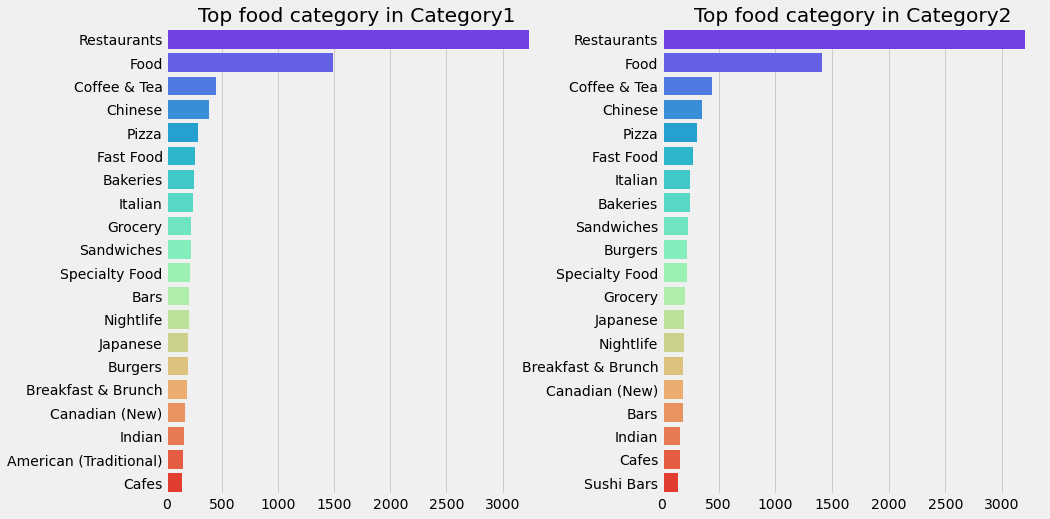

In [ ]:
f,ax = plt.subplots(1,2, figsize=(14,8))
ax1,ax2, = ax.flatten()
cnt = foodon['category1'].value_counts()[:20].to_frame()

sns.barplot(cnt['category1'], cnt.index, palette = 'rainbow', ax =ax1)
ax1.set_xlabel('')
ax1.set_title('Top food category in Category1')

cnt = foodon['category2'].value_counts()[:20].to_frame()

sns.barplot(cnt['category2'], cnt.index, palette = 'rainbow', ax =ax2)
ax2.set_xlabel('')
ax2.set_title('Top food category in Category2')
plt.subplots_adjust(wspace=0.3)
gc.collect()

c:\users\sumas\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\users\sumas\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



11416

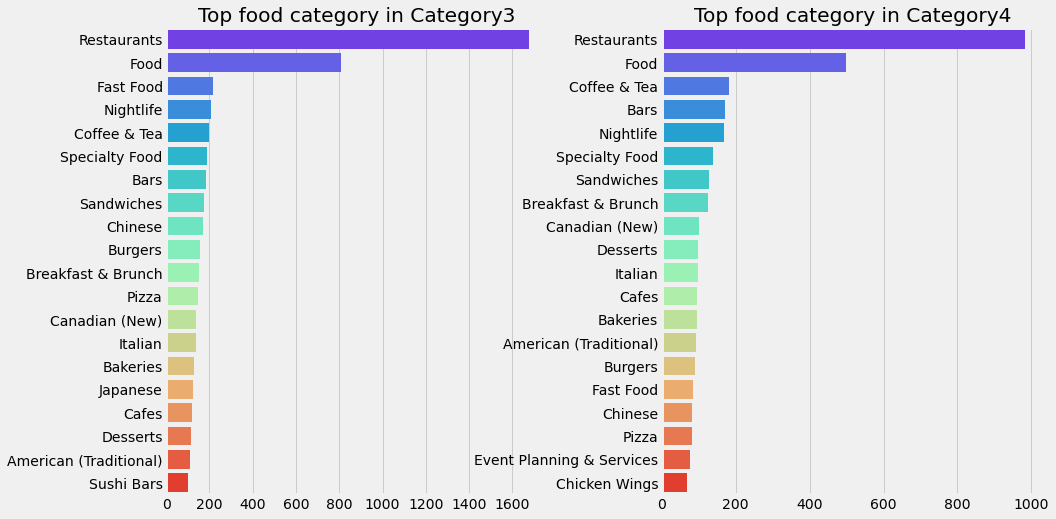

In [ ]:
f,ax = plt.subplots(1,2, figsize=(14,8))
ax1,ax2, = ax.flatten()
cnt = foodon['category3'].value_counts()[:20].to_frame()

sns.barplot(cnt['category3'], cnt.index, palette = 'rainbow', ax =ax1)
ax1.set_xlabel('')
ax1.set_title('Top food category in Category3')

cnt = foodon['category4'].value_counts()[:20].to_frame()

sns.barplot(cnt['category4'], cnt.index, palette = 'rainbow', ax =ax2)
ax2.set_xlabel('')
ax2.set_title('Top food category in Category4')
plt.subplots_adjust(wspace=0.3)
gc.collect()

c:\users\sumas\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\users\sumas\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



11474

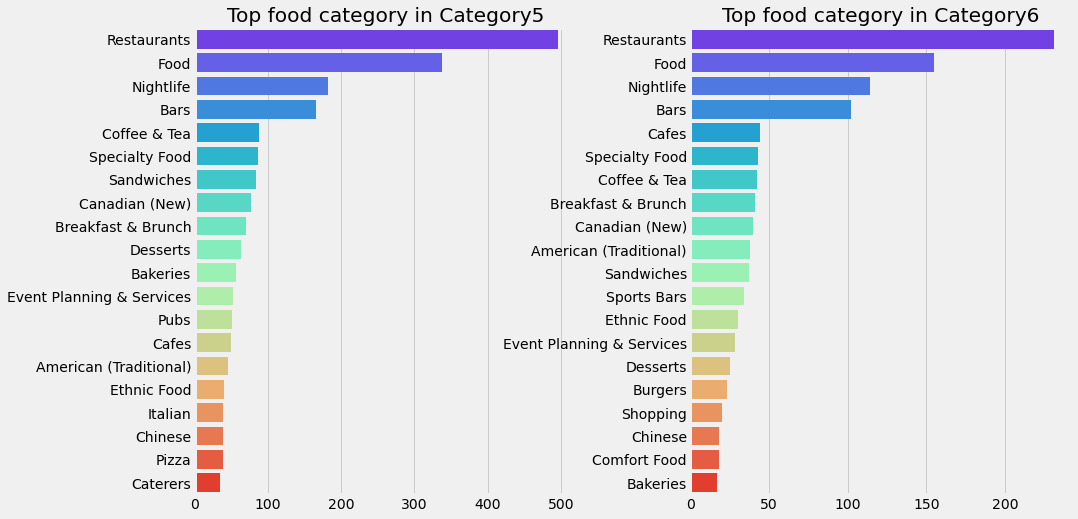

In [ ]:
f,ax = plt.subplots(1,2, figsize=(14,8))
ax1,ax2, = ax.flatten()
cnt = foodon['category5'].value_counts()[:20].to_frame()

sns.barplot(cnt['category5'], cnt.index, palette = 'rainbow', ax =ax1)
ax1.set_xlabel('')
ax1.set_title('Top food category in Category5')

cnt = foodon['category6'].value_counts()[:20].to_frame()

sns.barplot(cnt['category6'], cnt.index, palette = 'rainbow', ax =ax2)
ax2.set_xlabel('')
ax2.set_title('Top food category in Category6')
plt.subplots_adjust(wspace=0.3)
gc.collect()

c:\users\sumas\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\users\sumas\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



11212

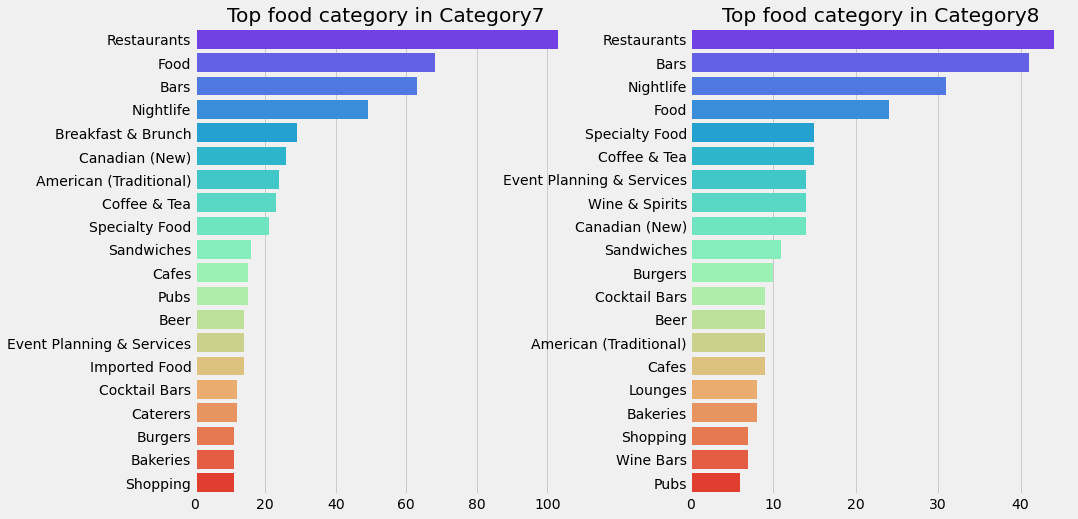

In [ ]:
f,ax = plt.subplots(1,2, figsize=(14,8))
ax1,ax2, = ax.flatten()
cnt = foodon['category7'].value_counts()[:20].to_frame()

sns.barplot(cnt['category7'], cnt.index, palette = 'rainbow', ax =ax1)
ax1.set_xlabel('')
ax1.set_title('Top food category in Category7')

cnt = foodon['category8'].value_counts()[:20].to_frame()

sns.barplot(cnt['category8'], cnt.index, palette = 'rainbow', ax =ax2)
ax2.set_xlabel('')
ax2.set_title('Top food category in Category8')
plt.subplots_adjust(wspace=0.3)
gc.collect()

c:\users\sumas\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

c:\users\sumas\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



11242

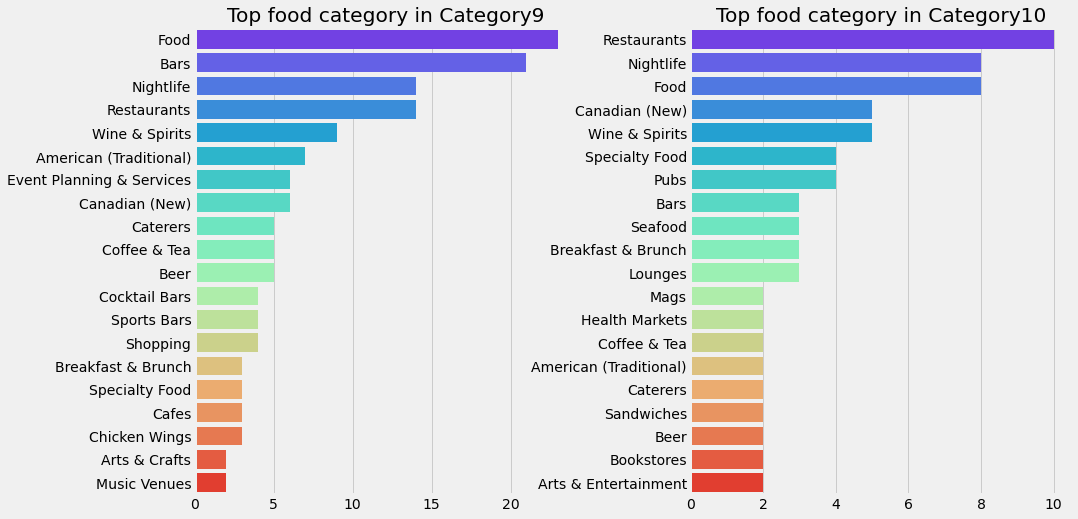

In [ ]:
f,ax = plt.subplots(1,2, figsize=(14,8))
ax1,ax2, = ax.flatten()
cnt = foodon['category9'].value_counts()[:20].to_frame()

sns.barplot(cnt['category9'], cnt.index, palette = 'rainbow', ax =ax1)
ax1.set_xlabel('')
ax1.set_title('Top food category in Category9')

cnt = foodon['category10'].value_counts()[:20].to_frame()

sns.barplot(cnt['category10'], cnt.index, palette = 'rainbow', ax =ax2)
ax2.set_xlabel('')
ax2.set_title('Top food category in Category10')
plt.subplots_adjust(wspace=0.3)
gc.collect()

#### City names with their total review count and average stars

In [ ]:
city_foodon_reviews = foodon[['city', 'review_count', 'stars']].groupby(['city']).agg({'review_count': 'sum', 'stars': 'mean'}).sort_values(by='review_count', ascending=False)
city_foodon_reviews.head(50)

,review_count,stars
city,,
Toronto,288146,3.482764
Mississauga,31530,3.412126
Markham,28968,3.317073
Richmond Hill,13974,3.285714
Scarborough,10878,3.324661
North York,10861,3.235714
Vaughan,8977,3.377451
Brampton,7193,3.340336
Etobicoke,7182,3.315182


#### Displaying the top 20 cities with highest no of review count

Text(0.5, 1.0, 'Top 20 cities by reviews')

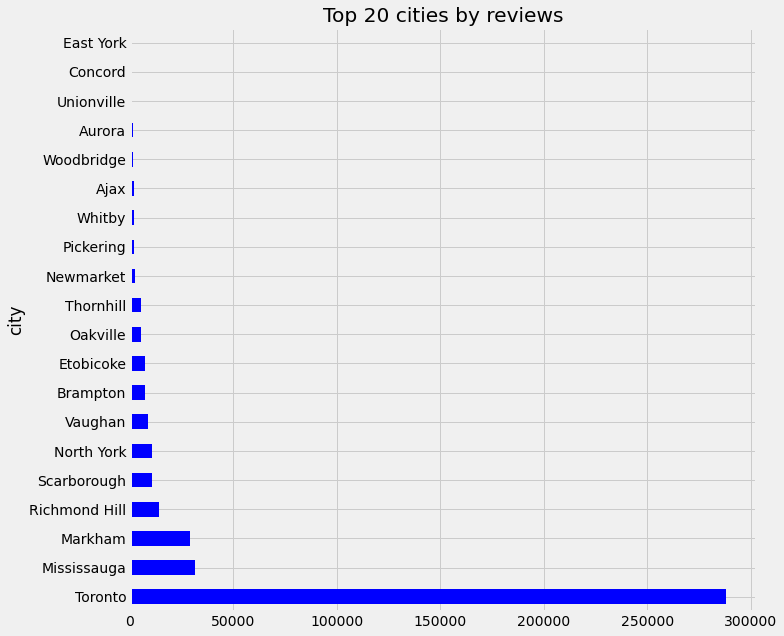

In [ ]:
city_foodon_reviews['review_count'][0:20].plot(kind='barh', stacked=False, figsize=[10,10],colormap='winter')
plt.title('Top 20 cities by reviews')

### Reviews Data Pre-Procesing

#### Load reviews data file

In [ ]:
review = pd.read_csv('csv/reviews.csv')
# review.drop('Unnamed: 0', axis=1, inplace=True)
review.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [ ]:
review.shape

(5261668, 9)

In [ ]:
foodon.business_id

0       HPA_qyMEddpAEtFof02ixg
1       hcRxdDg7DYryCxCoI8ySQA
2       jGennaZUr2MsJyRhijNBfA
3       buTr0hMiyDbjQvFJgm-Eew
4       3ME_CSB1bo4F0QMhQRUeOA
                 ...          
8619    WoI1IisL_AgmWdiJLRb-Zw
8620    2Puvh1tZnbEuIimMv0hJ5Q
8621    s6Hk0G2AWc2wi0tIzfdCSA
8622    87f7kR7nTz8WHnmtLM_S6w
8623    yQL8SrSETbbCI1U5esVJQw
Name: business_id, Length: 8624, dtype: object

#### Merge the filtered food business data and the reviews data based on business_id

In [ ]:
foodon_reviews = pd.merge(foodon, review, how='inner', on='business_id')
foodon_reviews.columns

Index(['business_id', 'name', 'neighborhood', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars_x', 'review_count',
       'is_open', 'category1', 'category2', 'category3', 'category4',
       'category5', 'category6', 'category7', 'category8', 'category9',
       'category10', 'review_id', 'user_id', 'stars_y', 'date', 'text',
       'useful', 'funny', 'cool'],
      dtype='object')

In [ ]:
foodon_reviews

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars_x,...,category9,category10,review_id,user_id,stars_y,date,text,useful,funny,cool
0,xcgFnd-MwkZeO5G2HQ0gAQ,"""t & t bakery and cafe""",markham village,"""35 main street n""",markham,on,L3P 1X3,43.875177,-79.260153,4.0,...,nan,nan,0WaSfUvfuw_py2t6rYfgcA,JnXYIUYuFkGGxgneBkmeBw,5,2016-06-05,It's sad to read all these shallow reviews of ...,2,0,0
1,xcgFnd-MwkZeO5G2HQ0gAQ,"""t & t bakery and cafe""",markham village,"""35 main street n""",markham,on,L3P 1X3,43.875177,-79.260153,4.0,...,nan,nan,npO0_q1OAnoGz5oyXz9t1A,PBV_oQCoABX958-zjiLGwQ,2,2015-10-21,Re-reviewing this restaurant after our last 2 ...,2,1,0
2,xcgFnd-MwkZeO5G2HQ0gAQ,"""t & t bakery and cafe""",markham village,"""35 main street n""",markham,on,L3P 1X3,43.875177,-79.260153,4.0,...,nan,nan,-qf5sss_W53W0hN8bXTVYw,_f5fHijZb6xocu_jNeZvPA,5,2012-08-19,I'm always excited to go there for breakfast! ...,2,1,1
3,xcgFnd-MwkZeO5G2HQ0gAQ,"""t & t bakery and cafe""",markham village,"""35 main street n""",markham,on,L3P 1X3,43.875177,-79.260153,4.0,...,nan,nan,asbgm-pDBk55ZIy9NuRnug,148jNH5eI1ZHXLOm1DHiFg,5,2015-04-05,"This place is absolutely awesome.\n\nCheap, go...",1,2,0
4,xcgFnd-MwkZeO5G2HQ0gAQ,"""t & t bakery and cafe""",markham village,"""35 main street n""",markham,on,L3P 1X3,43.875177,-79.260153,4.0,...,nan,nan,_E-LFY0YnjwwiZ1K0m8cuw,abG99DJ23yOBkhaqICuFyA,5,2014-02-03,This place is an iconic spot in Markham Villag...,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438279,nGjEV4bn0DPk8bcb0C6Aig,"""sweet serendipity bake shop""",the danforth,"""1335 danforth avenue""",toronto,on,M4J 1N1,43.682054,-79.328996,4.5,...,nan,nan,2Dg_RzFDkPQBnbdwzzjmMg,f6vsIAG-k4R3_oUgtHtazQ,4,2016-10-19,Ordered the pumpkin pie for thanksgiving and i...,2,0,0
438280,kLFm_kehXNZkUc1oa2-Eaw,"""nuno's churrasqueira""",brockton village,"""1560 dundas st w""",toronto,on,M6K 1T5,43.649789,-79.433928,3.0,...,nan,nan,Pz2I9INhJGqPaSvPPmr79g,N6QHZume4KDbcfR5_ue5zA,1,2011-11-27,"One word, horrible! Just because I don't speak...",0,0,0
438281,kLFm_kehXNZkUc1oa2-Eaw,"""nuno's churrasqueira""",brockton village,"""1560 dundas st w""",toronto,on,M6K 1T5,43.649789,-79.433928,3.0,...,nan,nan,ykL_MhYpraYt3TkJaOPeaw,RrLRd9M2Q6iYCNnKMZsdtw,4,2011-10-14,"Tiny little restaurant at Dundas and Sheridan,...",2,1,2
438282,kLFm_kehXNZkUc1oa2-Eaw,"""nuno's churrasqueira""",brockton village,"""1560 dundas st w""",toronto,on,M6K 1T5,43.649789,-79.433928,3.0,...,nan,nan,zCJjY733RZPnwK4mn1s9xQ,F3MUcn2wx84vK6Or2Es-wg,3,2011-11-12,Went here for dinner last night. Portions were...,0,0,1


#### Save into csv file

In [ ]:
foodon_reviews.to_csv("csv/foodonreviews.csv")

In [ ]:
import pandas as pd
foodon_reviews = pd.read_csv('csv/foodonreviews.csv')
foodon_reviews.drop('Unnamed: 0',axis=1,inplace= True)


,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars_x,...,category9,category10,review_id,user_id,stars_y,date,text,useful,funny,cool
0,xcgFnd-MwkZeO5G2HQ0gAQ,"""t & t bakery and cafe""",markham village,"""35 main street n""",markham,on,L3P 1X3,43.875177,-79.260153,4.0,...,NaN,NaN,0WaSfUvfuw_py2t6rYfgcA,JnXYIUYuFkGGxgneBkmeBw,5,2016-06-05,It's sad to read all these shallow reviews of ...,2,0,0
1,xcgFnd-MwkZeO5G2HQ0gAQ,"""t & t bakery and cafe""",markham village,"""35 main street n""",markham,on,L3P 1X3,43.875177,-79.260153,4.0,...,NaN,NaN,npO0_q1OAnoGz5oyXz9t1A,PBV_oQCoABX958-zjiLGwQ,2,2015-10-21,Re-reviewing this restaurant after our last 2 ...,2,1,0
2,xcgFnd-MwkZeO5G2HQ0gAQ,"""t & t bakery and cafe""",markham village,"""35 main street n""",markham,on,L3P 1X3,43.875177,-79.260153,4.0,...,NaN,NaN,-qf5sss_W53W0hN8bXTVYw,_f5fHijZb6xocu_jNeZvPA,5,2012-08-19,I'm always excited to go there for breakfast! ...,2,1,1
3,xcgFnd-MwkZeO5G2HQ0gAQ,"""t & t bakery and cafe""",markham village,"""35 main street n""",markham,on,L3P 1X3,43.875177,-79.260153,4.0,...,NaN,NaN,asbgm-pDBk55ZIy9NuRnug,148jNH5eI1ZHXLOm1DHiFg,5,2015-04-05,"This place is absolutely awesome.\n\nCheap, go...",1,2,0
4,xcgFnd-MwkZeO5G2HQ0gAQ,"""t & t bakery and cafe""",markham village,"""35 main street n""",markham,on,L3P 1X3,43.875177,-79.260153,4.0,...,NaN,NaN,_E-LFY0YnjwwiZ1K0m8cuw,abG99DJ23yOBkhaqICuFyA,5,2014-02-03,This place is an iconic spot in Markham Villag...,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438279,nGjEV4bn0DPk8bcb0C6Aig,"""sweet serendipity bake shop""",the danforth,"""1335 danforth avenue""",toronto,on,M4J 1N1,43.682054,-79.328996,4.5,...,NaN,NaN,2Dg_RzFDkPQBnbdwzzjmMg,f6vsIAG-k4R3_oUgtHtazQ,4,2016-10-19,Ordered the pumpkin pie for thanksgiving and i...,2,0,0
438280,kLFm_kehXNZkUc1oa2-Eaw,"""nuno's churrasqueira""",brockton village,"""1560 dundas st w""",toronto,on,M6K 1T5,43.649789,-79.433928,3.0,...,NaN,NaN,Pz2I9INhJGqPaSvPPmr79g,N6QHZume4KDbcfR5_ue5zA,1,2011-11-27,"One word, horrible! Just because I don't speak...",0,0,0
438281,kLFm_kehXNZkUc1oa2-Eaw,"""nuno's churrasqueira""",brockton village,"""1560 dundas st w""",toronto,on,M6K 1T5,43.649789,-79.433928,3.0,...,NaN,NaN,ykL_MhYpraYt3TkJaOPeaw,RrLRd9M2Q6iYCNnKMZsdtw,4,2011-10-14,"Tiny little restaurant at Dundas and Sheridan,...",2,1,2
438282,kLFm_kehXNZkUc1oa2-Eaw,"""nuno's churrasqueira""",brockton village,"""1560 dundas st w""",toronto,on,M6K 1T5,43.649789,-79.433928,3.0,...,NaN,NaN,zCJjY733RZPnwK4mn1s9xQ,F3MUcn2wx84vK6Or2Es-wg,3,2011-11-12,Went here for dinner last night. Portions were...,0,0,1


In [ ]:
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

import re # regular expression
import string # for finding punctuation in text
import nltk
nltk.download('stopwords')# preprocessing text
nltk.download('wordnet')

from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sumas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sumas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
foodon_reviews = pd.read_csv('csv/foodonreviews.csv')
foodon_reviews.drop('Unnamed: 0',axis=1,inplace= True)
foodon_reviews

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars_x,...,category9,category10,review_id,user_id,stars_y,date,text,useful,funny,cool
0,xcgFnd-MwkZeO5G2HQ0gAQ,"""t & t bakery and cafe""",markham village,"""35 main street n""",markham,on,L3P 1X3,43.875177,-79.260153,4.0,...,NaN,NaN,0WaSfUvfuw_py2t6rYfgcA,JnXYIUYuFkGGxgneBkmeBw,5,2016-06-05,It's sad to read all these shallow reviews of ...,2,0,0
1,xcgFnd-MwkZeO5G2HQ0gAQ,"""t & t bakery and cafe""",markham village,"""35 main street n""",markham,on,L3P 1X3,43.875177,-79.260153,4.0,...,NaN,NaN,npO0_q1OAnoGz5oyXz9t1A,PBV_oQCoABX958-zjiLGwQ,2,2015-10-21,Re-reviewing this restaurant after our last 2 ...,2,1,0
2,xcgFnd-MwkZeO5G2HQ0gAQ,"""t & t bakery and cafe""",markham village,"""35 main street n""",markham,on,L3P 1X3,43.875177,-79.260153,4.0,...,NaN,NaN,-qf5sss_W53W0hN8bXTVYw,_f5fHijZb6xocu_jNeZvPA,5,2012-08-19,I'm always excited to go there for breakfast! ...,2,1,1
3,xcgFnd-MwkZeO5G2HQ0gAQ,"""t & t bakery and cafe""",markham village,"""35 main street n""",markham,on,L3P 1X3,43.875177,-79.260153,4.0,...,NaN,NaN,asbgm-pDBk55ZIy9NuRnug,148jNH5eI1ZHXLOm1DHiFg,5,2015-04-05,"This place is absolutely awesome.\n\nCheap, go...",1,2,0
4,xcgFnd-MwkZeO5G2HQ0gAQ,"""t & t bakery and cafe""",markham village,"""35 main street n""",markham,on,L3P 1X3,43.875177,-79.260153,4.0,...,NaN,NaN,_E-LFY0YnjwwiZ1K0m8cuw,abG99DJ23yOBkhaqICuFyA,5,2014-02-03,This place is an iconic spot in Markham Villag...,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438279,nGjEV4bn0DPk8bcb0C6Aig,"""sweet serendipity bake shop""",the danforth,"""1335 danforth avenue""",toronto,on,M4J 1N1,43.682054,-79.328996,4.5,...,NaN,NaN,2Dg_RzFDkPQBnbdwzzjmMg,f6vsIAG-k4R3_oUgtHtazQ,4,2016-10-19,Ordered the pumpkin pie for thanksgiving and i...,2,0,0
438280,kLFm_kehXNZkUc1oa2-Eaw,"""nuno's churrasqueira""",brockton village,"""1560 dundas st w""",toronto,on,M6K 1T5,43.649789,-79.433928,3.0,...,NaN,NaN,Pz2I9INhJGqPaSvPPmr79g,N6QHZume4KDbcfR5_ue5zA,1,2011-11-27,"One word, horrible! Just because I don't speak...",0,0,0
438281,kLFm_kehXNZkUc1oa2-Eaw,"""nuno's churrasqueira""",brockton village,"""1560 dundas st w""",toronto,on,M6K 1T5,43.649789,-79.433928,3.0,...,NaN,NaN,ykL_MhYpraYt3TkJaOPeaw,RrLRd9M2Q6iYCNnKMZsdtw,4,2011-10-14,"Tiny little restaurant at Dundas and Sheridan,...",2,1,2
438282,kLFm_kehXNZkUc1oa2-Eaw,"""nuno's churrasqueira""",brockton village,"""1560 dundas st w""",toronto,on,M6K 1T5,43.649789,-79.433928,3.0,...,NaN,NaN,zCJjY733RZPnwK4mn1s9xQ,F3MUcn2wx84vK6Or2Es-wg,3,2011-11-12,Went here for dinner last night. Portions were...,0,0,1


#### Lemmatization

In [ ]:
#Lemmatization
from textblob import Word
foodon_reviews['text']=foodon_reviews['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
foodon_reviews['text'].head()

0    It's sad to read all these shallow review of a...
1    Re-reviewing this restaurant after our last 2 ...
2    I'm always excited to go there for breakfast! ...
3    This place is absolutely awesome. Cheap, good ...
4    This place is an iconic spot in Markham Villag...
Name: text, dtype: object

In [ ]:
foodon_reviews.to_csv('csv/foodon_lem.csv')

In [ ]:
foodon_reviews_1=pd.read_csv("csv/foodon_lem.csv")
foodon_reviews_1.drop('Unnamed: 0',axis=1,inplace= True)
foodon_reviews_1

In [ ]:
foodon_reviews_1.columns

#### Merge duplicate columns and drop the others

In [ ]:
foodon_reviews_1['stars'] = foodon_reviews_1['stars_x']
foodon_reviews_1.drop('stars_x',axis=1, inplace=True)
foodon_reviews_1.drop('stars_y',axis=1, inplace=True)
foodon_reviews_1

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,review_count,...,category9,category10,review_id,user_id,date,text,useful,funny,cool,stars
0,xcgFnd-MwkZeO5G2HQ0gAQ,"""t & t bakery and cafe""",markham village,"""35 main street n""",markham,on,L3P 1X3,43.875177,-79.260153,38,...,NaN,NaN,0WaSfUvfuw_py2t6rYfgcA,JnXYIUYuFkGGxgneBkmeBw,2016-06-05,It's sad to read all these shallow review of a...,2,0,0,4.0
1,xcgFnd-MwkZeO5G2HQ0gAQ,"""t & t bakery and cafe""",markham village,"""35 main street n""",markham,on,L3P 1X3,43.875177,-79.260153,38,...,NaN,NaN,npO0_q1OAnoGz5oyXz9t1A,PBV_oQCoABX958-zjiLGwQ,2015-10-21,Re-reviewing this restaurant after our last 2 ...,2,1,0,4.0
2,xcgFnd-MwkZeO5G2HQ0gAQ,"""t & t bakery and cafe""",markham village,"""35 main street n""",markham,on,L3P 1X3,43.875177,-79.260153,38,...,NaN,NaN,-qf5sss_W53W0hN8bXTVYw,_f5fHijZb6xocu_jNeZvPA,2012-08-19,I'm always excited to go there for breakfast! ...,2,1,1,4.0
3,xcgFnd-MwkZeO5G2HQ0gAQ,"""t & t bakery and cafe""",markham village,"""35 main street n""",markham,on,L3P 1X3,43.875177,-79.260153,38,...,NaN,NaN,asbgm-pDBk55ZIy9NuRnug,148jNH5eI1ZHXLOm1DHiFg,2015-04-05,"This place is absolutely awesome. Cheap, good ...",1,2,0,4.0
4,xcgFnd-MwkZeO5G2HQ0gAQ,"""t & t bakery and cafe""",markham village,"""35 main street n""",markham,on,L3P 1X3,43.875177,-79.260153,38,...,NaN,NaN,_E-LFY0YnjwwiZ1K0m8cuw,abG99DJ23yOBkhaqICuFyA,2014-02-03,This place is an iconic spot in Markham Villag...,1,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438279,nGjEV4bn0DPk8bcb0C6Aig,"""sweet serendipity bake shop""",the danforth,"""1335 danforth avenue""",toronto,on,M4J 1N1,43.682054,-79.328996,22,...,NaN,NaN,2Dg_RzFDkPQBnbdwzzjmMg,f6vsIAG-k4R3_oUgtHtazQ,2016-10-19,Ordered the pumpkin pie for thanksgiving and i...,2,0,0,4.5
438280,kLFm_kehXNZkUc1oa2-Eaw,"""nuno's churrasqueira""",brockton village,"""1560 dundas st w""",toronto,on,M6K 1T5,43.649789,-79.433928,4,...,NaN,NaN,Pz2I9INhJGqPaSvPPmr79g,N6QHZume4KDbcfR5_ue5zA,2011-11-27,"One word, horrible! Just because I don't speak...",0,0,0,3.0
438281,kLFm_kehXNZkUc1oa2-Eaw,"""nuno's churrasqueira""",brockton village,"""1560 dundas st w""",toronto,on,M6K 1T5,43.649789,-79.433928,4,...,NaN,NaN,ykL_MhYpraYt3TkJaOPeaw,RrLRd9M2Q6iYCNnKMZsdtw,2011-10-14,"Tiny little restaurant at Dundas and Sheridan,...",2,1,2,3.0
438282,kLFm_kehXNZkUc1oa2-Eaw,"""nuno's churrasqueira""",brockton village,"""1560 dundas st w""",toronto,on,M6K 1T5,43.649789,-79.433928,4,...,NaN,NaN,zCJjY733RZPnwK4mn1s9xQ,F3MUcn2wx84vK6Or2Es-wg,2011-11-12,Went here for dinner last night. Portions were...,0,0,1,3.0


#### Method for pre-processing

In [ ]:
def preprocess(x):
    x = re.sub('[^a-z\s]', '', x.lower())                  # get rid of noise
    x = [w for w in x.split() if w not in set(stopwords)]  # remove stopwords
    return ' '.join(x) # then join the text again

'''
    Takes in a string of text, then performs the following:
    1. Performs case normalization
    2. Remove all punctuation
    3. Remove all stopwords
    4. Return the cleaned text as a list of words
    '''




,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,review_count,...,review_id,user_id,date,text,useful,funny,cool,stars,text_clear,senti_polarity
0,xcgFnd-MwkZeO5G2HQ0gAQ,"""t & t bakery and cafe""",markham village,"""35 main street n""",markham,on,L3P 1X3,43.875177,-79.260153,38,...,0WaSfUvfuw_py2t6rYfgcA,JnXYIUYuFkGGxgneBkmeBw,2016-06-05,It's sad to read all these shallow review of a...,2,0,0,4.0,sad read shallow review markham village staple...,-0.049020
1,xcgFnd-MwkZeO5G2HQ0gAQ,"""t & t bakery and cafe""",markham village,"""35 main street n""",markham,on,L3P 1X3,43.875177,-79.260153,38,...,npO0_q1OAnoGz5oyXz9t1A,PBV_oQCoABX958-zjiLGwQ,2015-10-21,Re-reviewing this restaurant after our last 2 ...,2,1,0,4.0,rereviewing restaurant last visit bust visit t...,-0.357143
2,xcgFnd-MwkZeO5G2HQ0gAQ,"""t & t bakery and cafe""",markham village,"""35 main street n""",markham,on,L3P 1X3,43.875177,-79.260153,38,...,-qf5sss_W53W0hN8bXTVYw,_f5fHijZb6xocu_jNeZvPA,2012-08-19,I'm always excited to go there for breakfast! ...,2,1,1,4.0,im always excited go breakfast everything look...,0.199524
3,xcgFnd-MwkZeO5G2HQ0gAQ,"""t & t bakery and cafe""",markham village,"""35 main street n""",markham,on,L3P 1X3,43.875177,-79.260153,38,...,asbgm-pDBk55ZIy9NuRnug,148jNH5eI1ZHXLOm1DHiFg,2015-04-05,"This place is absolutely awesome. Cheap, good ...",1,2,0,4.0,place absolutely awesome cheap good food great...,0.638095
4,xcgFnd-MwkZeO5G2HQ0gAQ,"""t & t bakery and cafe""",markham village,"""35 main street n""",markham,on,L3P 1X3,43.875177,-79.260153,38,...,_E-LFY0YnjwwiZ1K0m8cuw,abG99DJ23yOBkhaqICuFyA,2014-02-03,This place is an iconic spot in Markham Villag...,1,0,0,4.0,place iconic spot markham village family owned...,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438279,nGjEV4bn0DPk8bcb0C6Aig,"""sweet serendipity bake shop""",the danforth,"""1335 danforth avenue""",toronto,on,M4J 1N1,43.682054,-79.328996,22,...,2Dg_RzFDkPQBnbdwzzjmMg,f6vsIAG-k4R3_oUgtHtazQ,2016-10-19,Ordered the pumpkin pie for thanksgiving and i...,2,0,0,4.5,ordered pumpkin pie thanksgiving wa delicious ...,0.546875
438280,kLFm_kehXNZkUc1oa2-Eaw,"""nuno's churrasqueira""",brockton village,"""1560 dundas st w""",toronto,on,M6K 1T5,43.649789,-79.433928,4,...,Pz2I9INhJGqPaSvPPmr79g,N6QHZume4KDbcfR5_ue5zA,2011-11-27,"One word, horrible! Just because I don't speak...",0,0,0,3.0,one word horrible dont speak portuguese dont t...,-0.629167
438281,kLFm_kehXNZkUc1oa2-Eaw,"""nuno's churrasqueira""",brockton village,"""1560 dundas st w""",toronto,on,M6K 1T5,43.649789,-79.433928,4,...,ykL_MhYpraYt3TkJaOPeaw,RrLRd9M2Q6iYCNnKMZsdtw,2011-10-14,"Tiny little restaurant at Dundas and Sheridan,...",2,1,2,3.0,tiny little restaurant dundas sheridan like po...,0.167803
438282,kLFm_kehXNZkUc1oa2-Eaw,"""nuno's churrasqueira""",brockton village,"""1560 dundas st w""",toronto,on,M6K 1T5,43.649789,-79.433928,4,...,zCJjY733RZPnwK4mn1s9xQ,F3MUcn2wx84vK6Or2Es-wg,2011-11-12,Went here for dinner last night. Portions were...,0,0,1,3.0,went dinner last night portions gigantic steak...,-0.200000


#### Preprocess the text reviews

In [ ]:
# let's find out which stopwords need to remove. We'll use english stopwords.
i = nltk.corpus.stopwords.words('english')
# punctuations to remove
j = list(string.punctuation)
# finally let's combine all of these
stopwords = set(i).union(j)
foodon_reviews_1['text_clear'] = foodon_reviews_1['text'].apply(preprocess)

#### Sentiment Polarity finding method

In [ ]:
def sentiment(x):
    sentiment = TextBlob(x)
    return sentiment.sentiment.polarity

#### Calculate sentiment polarity for the processed reviews

In [ ]:
foodon_reviews_1['senti_polarity'] = foodon_reviews_1['text_clear'].apply(sentiment)
foodon_reviews_1

#### Save the updated data into csv

In [ ]:
foodon_reviews_1.to_csv('csv/foodon_processed.csv')

In [ ]:
foodon_reviews_2=pd.read_csv("csv/foodon_processed.csv")
foodon_reviews_2.drop('Unnamed: 0',axis=1,inplace= True)
foodon_reviews_2

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,review_count,...,review_id,user_id,date,text,useful,funny,cool,stars,text_clear,senti_polarity
0,xcgFnd-MwkZeO5G2HQ0gAQ,"""t & t bakery and cafe""",markham village,"""35 main street n""",markham,on,L3P 1X3,43.875177,-79.260153,38,...,0WaSfUvfuw_py2t6rYfgcA,JnXYIUYuFkGGxgneBkmeBw,2016-06-05,It's sad to read all these shallow review of a...,2,0,0,4.0,sad read shallow review markham village staple...,-0.049020
1,xcgFnd-MwkZeO5G2HQ0gAQ,"""t & t bakery and cafe""",markham village,"""35 main street n""",markham,on,L3P 1X3,43.875177,-79.260153,38,...,npO0_q1OAnoGz5oyXz9t1A,PBV_oQCoABX958-zjiLGwQ,2015-10-21,Re-reviewing this restaurant after our last 2 ...,2,1,0,4.0,rereviewing restaurant last visit bust visit t...,-0.357143
2,xcgFnd-MwkZeO5G2HQ0gAQ,"""t & t bakery and cafe""",markham village,"""35 main street n""",markham,on,L3P 1X3,43.875177,-79.260153,38,...,-qf5sss_W53W0hN8bXTVYw,_f5fHijZb6xocu_jNeZvPA,2012-08-19,I'm always excited to go there for breakfast! ...,2,1,1,4.0,im always excited go breakfast everything look...,0.199524
3,xcgFnd-MwkZeO5G2HQ0gAQ,"""t & t bakery and cafe""",markham village,"""35 main street n""",markham,on,L3P 1X3,43.875177,-79.260153,38,...,asbgm-pDBk55ZIy9NuRnug,148jNH5eI1ZHXLOm1DHiFg,2015-04-05,"This place is absolutely awesome. Cheap, good ...",1,2,0,4.0,place absolutely awesome cheap good food great...,0.638095
4,xcgFnd-MwkZeO5G2HQ0gAQ,"""t & t bakery and cafe""",markham village,"""35 main street n""",markham,on,L3P 1X3,43.875177,-79.260153,38,...,_E-LFY0YnjwwiZ1K0m8cuw,abG99DJ23yOBkhaqICuFyA,2014-02-03,This place is an iconic spot in Markham Villag...,1,0,0,4.0,place iconic spot markham village family owned...,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438279,nGjEV4bn0DPk8bcb0C6Aig,"""sweet serendipity bake shop""",the danforth,"""1335 danforth avenue""",toronto,on,M4J 1N1,43.682054,-79.328996,22,...,2Dg_RzFDkPQBnbdwzzjmMg,f6vsIAG-k4R3_oUgtHtazQ,2016-10-19,Ordered the pumpkin pie for thanksgiving and i...,2,0,0,4.5,ordered pumpkin pie thanksgiving wa delicious ...,0.546875
438280,kLFm_kehXNZkUc1oa2-Eaw,"""nuno's churrasqueira""",brockton village,"""1560 dundas st w""",toronto,on,M6K 1T5,43.649789,-79.433928,4,...,Pz2I9INhJGqPaSvPPmr79g,N6QHZume4KDbcfR5_ue5zA,2011-11-27,"One word, horrible! Just because I don't speak...",0,0,0,3.0,one word horrible dont speak portuguese dont t...,-0.629167
438281,kLFm_kehXNZkUc1oa2-Eaw,"""nuno's churrasqueira""",brockton village,"""1560 dundas st w""",toronto,on,M6K 1T5,43.649789,-79.433928,4,...,ykL_MhYpraYt3TkJaOPeaw,RrLRd9M2Q6iYCNnKMZsdtw,2011-10-14,"Tiny little restaurant at Dundas and Sheridan,...",2,1,2,3.0,tiny little restaurant dundas sheridan like po...,0.167803
438282,kLFm_kehXNZkUc1oa2-Eaw,"""nuno's churrasqueira""",brockton village,"""1560 dundas st w""",toronto,on,M6K 1T5,43.649789,-79.433928,4,...,zCJjY733RZPnwK4mn1s9xQ,F3MUcn2wx84vK6Or2Es-wg,2011-11-12,Went here for dinner last night. Portions were...,0,0,1,3.0,went dinner last night portions gigantic steak...,-0.200000


#### Compute average polarity values against each business_id

In [ ]:
spm = foodon_reviews_2.groupby(foodon_reviews_2.business_id)['senti_polarity'].mean().sort_values(ascending=True)

In [ ]:
spm

business_id
FduOLezzT4jWWArKcJ3K0w   -0.480952
56JttKUf9JnvTw4F1Dog8Q   -0.349252
gNwsaFJARMHuuYT3llIyDw   -0.343373
8g8M-xvViH98Sooxi-X1uw   -0.342889
IyrwvRwiwsKCiiKoxbHeFA   -0.342692
                            ...   
4Nn9QoRDkOr-DWMF7KPqOQ    0.590873
jO3Z1LNyGO_otDGuNxa7LA    0.602986
DQCsLrEHsDuRduZSVLgXMQ    0.615278
feVlqJbOXdWMZ7ID0UeaaA    0.632063
nbhBRhZtdaZmMMeb2i02pg    0.715370
Name: senti_polarity, Length: 12768, dtype: float64

In [ ]:
spm.to_csv("csv/sentimean.csv")

#### Merge the business data with sentiment polarity data

In [ ]:
foodon = pd.read_csv("csv/foodon.csv")
foodon.drop('Unnamed: 0',axis=1,inplace= True)

foodon_merged = pd.merge(foodon, spm1, how='inner', on='business_id')
foodon_merged

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,...,category2,category3,category4,category5,category6,category7,category8,category9,category10,senti_polarity
0,xcgFnd-MwkZeO5G2HQ0gAQ,"""t & t bakery and cafe""",markham village,"""35 main street n""",markham,on,L3P 1X3,43.875177,-79.260153,4.0,...,bagels,food,none,none,none,none,none,none,none,0.273081
1,Gu-xs3NIQTj3Mj2xYoN2aw,"""maxim bakery & restaurant""",NaN,"""9665 bayview avenue, unit 1-4""",richmond hill,on,L4C 9V4,43.867565,-79.412662,3.5,...,food,bakeries,restaurants,none,none,none,none,none,none,0.226272
2,lHYiCS-y8AFjUitv6MGpxg,"""starbucks""",liberty village,"""85 hanna avenue""",toronto,on,M6K 3S3,43.639863,-79.419533,4.0,...,coffee & tea,none,none,none,none,none,none,none,none,0.303710
3,1K4qrnfyzKzGgJPBEcJaNQ,"""chula taberna mexicana""",leslieville,"""1058 gerrard street e""",toronto,on,M4M 3A6,43.669256,-79.335902,3.5,...,nightlife,mexican,restaurants,bars,none,none,none,none,none,0.260709
4,AtdXq_gu9NTE5rx4ct_dGg,"""davidstea""",ryerson,"""10 dundas street e""",toronto,on,M5B 2G9,43.656729,-79.380718,4.0,...,food,tea rooms,none,none,none,none,none,none,none,0.196952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12763,sEAKw3MZkER1u_1fzIeD3g,"""gol take-out""",willowdale,"""5 spring garden avenue""",toronto,on,M2N 3G1,43.764386,-79.411206,4.0,...,restaurants,international grocery,ethnic grocery,persian/iranian,none,none,none,none,none,0.341252
12764,1HplwLVbBid-Bgw1sEPGFg,"""dumpling melody bistro""",etobicoke,"""3266 w lake shore boulevard""",toronto,on,M8V 1M4,43.596858,-79.523305,2.0,...,chinese,none,none,none,none,none,none,none,none,0.110918
12765,fukaxeFh8W9ijOp8sCrDyA,"""heritage fish & chips""",NaN,"""1 fisherman drive""",brampton,on,L7A 2X9,43.714303,-79.799411,4.0,...,restaurants,none,none,none,none,none,none,none,none,0.379017
12766,nGjEV4bn0DPk8bcb0C6Aig,"""sweet serendipity bake shop""",the danforth,"""1335 danforth avenue""",toronto,on,M4J 1N1,43.682054,-79.328996,4.5,...,food,none,none,none,none,none,none,none,none,0.371825


In [ ]:
foodon_merged.to_csv("csv/final_data.csv")

In [ ]:
foodon_merged = pd.read_csv("csv/final_data.csv")
foodon_merged.drop('Unnamed: 0',axis=1,inplace= True)
foodon_merged

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,...,category2,category3,category4,category5,category6,category7,category8,category9,category10,senti_polarity
0,xcgFnd-MwkZeO5G2HQ0gAQ,"""t & t bakery and cafe""",markham village,"""35 main street n""",markham,on,L3P 1X3,43.875177,-79.260153,4.0,...,bagels,food,none,none,none,none,none,none,none,0.273081
1,Gu-xs3NIQTj3Mj2xYoN2aw,"""maxim bakery & restaurant""",NaN,"""9665 bayview avenue, unit 1-4""",richmond hill,on,L4C 9V4,43.867565,-79.412662,3.5,...,food,bakeries,restaurants,none,none,none,none,none,none,0.226272
2,lHYiCS-y8AFjUitv6MGpxg,"""starbucks""",liberty village,"""85 hanna avenue""",toronto,on,M6K 3S3,43.639863,-79.419533,4.0,...,coffee & tea,none,none,none,none,none,none,none,none,0.303710
3,1K4qrnfyzKzGgJPBEcJaNQ,"""chula taberna mexicana""",leslieville,"""1058 gerrard street e""",toronto,on,M4M 3A6,43.669256,-79.335902,3.5,...,nightlife,mexican,restaurants,bars,none,none,none,none,none,0.260709
4,AtdXq_gu9NTE5rx4ct_dGg,"""davidstea""",ryerson,"""10 dundas street e""",toronto,on,M5B 2G9,43.656729,-79.380718,4.0,...,food,tea rooms,none,none,none,none,none,none,none,0.196952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12763,sEAKw3MZkER1u_1fzIeD3g,"""gol take-out""",willowdale,"""5 spring garden avenue""",toronto,on,M2N 3G1,43.764386,-79.411206,4.0,...,restaurants,international grocery,ethnic grocery,persian/iranian,none,none,none,none,none,0.341252
12764,1HplwLVbBid-Bgw1sEPGFg,"""dumpling melody bistro""",etobicoke,"""3266 w lake shore boulevard""",toronto,on,M8V 1M4,43.596858,-79.523305,2.0,...,chinese,none,none,none,none,none,none,none,none,0.110918
12765,fukaxeFh8W9ijOp8sCrDyA,"""heritage fish & chips""",NaN,"""1 fisherman drive""",brampton,on,L7A 2X9,43.714303,-79.799411,4.0,...,restaurants,none,none,none,none,none,none,none,none,0.379017
12766,nGjEV4bn0DPk8bcb0C6Aig,"""sweet serendipity bake shop""",the danforth,"""1335 danforth avenue""",toronto,on,M4J 1N1,43.682054,-79.328996,4.5,...,food,none,none,none,none,none,none,none,none,0.371825


In [ ]:
foodon_merged.columns

Index(['business_id', 'name', 'neighborhood', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars', 'review_count',
       'is_open', 'category1', 'category2', 'category3', 'category4',
       'category5', 'category6', 'category7', 'category8', 'category9',
       'category10', 'senti_polarity'],
      dtype='object')

#### Histograms of text length distributions for each star rating.

Stars more than 3.5 are all distributed between the range 0 and 0.5 of sentipolarity values.

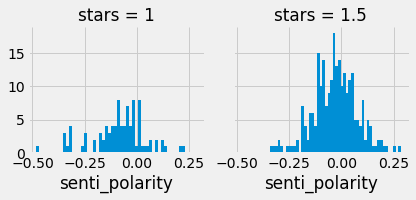

In [ ]:
g = sns.FacetGrid(data=foodon_merged, col='stars',col_order=[1,1.5])
g.map(plt.hist, 'senti_polarity', bins=50)

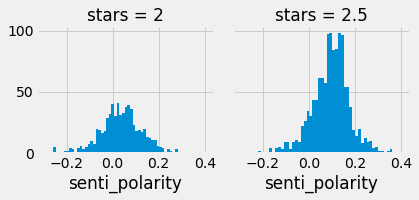

In [ ]:
g = sns.FacetGrid(data=foodon_merged, col='stars',col_order=[2,2.5])
g.map(plt.hist, 'senti_polarity', bins=50)

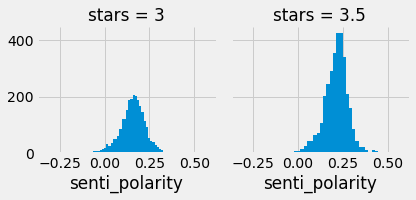

In [ ]:
g = sns.FacetGrid(data=foodon_merged, col='stars',col_order=[3,3.5])
g.map(plt.hist, 'senti_polarity', bins=50)

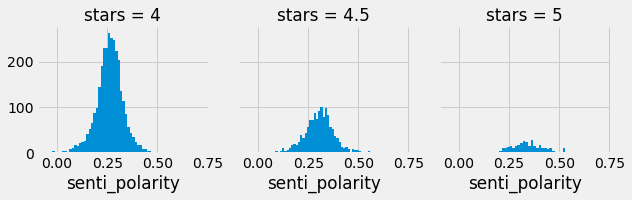

In [ ]:
g = sns.FacetGrid(data=foodon_merged, col='stars',col_order=[4,4.5,5])
g.map(plt.hist, 'senti_polarity', bins=50)

#### Consider only the rows that have values greater than 3.5 stars and sentipolarity value greater than 0.

In [ ]:
goodfood= foodon_merged[(foodon_merged['senti_polarity']>0)&(foodon_merged['stars']>3.5)]
goodfood

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,...,category2,category3,category4,category5,category6,category7,category8,category9,category10,senti_polarity
0,xcgFnd-MwkZeO5G2HQ0gAQ,"""t & t bakery and cafe""",markham village,"""35 main street n""",markham,on,L3P 1X3,43.875177,-79.260153,4.0,...,bagels,food,none,none,none,none,none,none,none,0.273081
2,lHYiCS-y8AFjUitv6MGpxg,"""starbucks""",liberty village,"""85 hanna avenue""",toronto,on,M6K 3S3,43.639863,-79.419533,4.0,...,coffee & tea,none,none,none,none,none,none,none,none,0.303710
4,AtdXq_gu9NTE5rx4ct_dGg,"""davidstea""",ryerson,"""10 dundas street e""",toronto,on,M5B 2G9,43.656729,-79.380718,4.0,...,food,tea rooms,none,none,none,none,none,none,none,0.196952
5,nbhBRhZtdaZmMMeb2i02pg,"""sunnyside grill""",NaN,"""2777 steeles avenue w""",toronto,on,M3J 3K5,43.781816,-79.490433,5.0,...,breakfast & brunch,none,none,none,none,none,none,none,none,0.715370
6,FXHfcFVEfI1vVngW2gVOpw,"""bampot house of tea & board games""",NaN,"""201 harbord street""",toronto,on,M5S 1H6,43.661582,-79.408878,4.0,...,restaurants,food,mediterranean,tea rooms,none,none,none,none,none,0.254588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12760,mR333GiHT-ep6fWjjgAw8w,"""fisherman's corner fish and chips""",NaN,"""3277 dufferin street""",north york,on,M6A 2T4,43.721010,-79.456175,4.0,...,restaurants,seafood,none,none,none,none,none,none,none,0.259023
12762,rRj-HQffzSe-2XDVRXRmXA,"""café havana""",NaN,"""1395 abbeywood dr, unit 1""",oakville,on,L6M 2W4,43.431697,-79.726393,4.5,...,cuban,none,none,none,none,none,none,none,none,0.413895
12763,sEAKw3MZkER1u_1fzIeD3g,"""gol take-out""",willowdale,"""5 spring garden avenue""",toronto,on,M2N 3G1,43.764386,-79.411206,4.0,...,restaurants,international grocery,ethnic grocery,persian/iranian,none,none,none,none,none,0.341252
12765,fukaxeFh8W9ijOp8sCrDyA,"""heritage fish & chips""",NaN,"""1 fisherman drive""",brampton,on,L7A 2X9,43.714303,-79.799411,4.0,...,restaurants,none,none,none,none,none,none,none,none,0.379017


#### Save the updated data

In [ ]:
goodfood.to_csv("csv/goodfood.csv")

### Find highest rated restaurants in the given dataset

In [ ]:
indian = 'indian',
mexican = 'mexican',
thai = 'thai',
japanese = 'japanese',
italian = 'italian',
american_t = 'american (traditional)',
american_new = 'american (new)',
pakistani = 'pakistani',
mid_east = 'middle eastern',
chinese = 'chinese',
canadian_new = 'canadian (new)',
hungarian = 'hungarian',
german = 'german',
vietnamese = 'vietnamese',


In [ ]:
fff = goodfood[['name', 'stars']].astype(str).apply(lambda x: '->Rating: '.join(x), axis=1).tolist()
fff

['"t & t bakery and cafe"->Rating: 4.0',
 '"starbucks"->Rating: 4.0',
 '"davidstea"->Rating: 4.0',
 '"sunnyside grill"->Rating: 5.0',
 '"bampot house of tea & board games"->Rating: 4.0',
 '"pizza pizza"->Rating: 4.0',
 '"maki my way"->Rating: 4.5',
 '"via panini"->Rating: 4.0',
 '"pablo\'s grill it up"->Rating: 4.0',
 '"montreal delicatessen & family restaurant"->Rating: 4.0',
 '"playa cabana"->Rating: 4.0',
 '"pho linh"->Rating: 4.0',
 '"truscott italian bakery & delicatessen"->Rating: 4.0',
 '"green post"->Rating: 4.0',
 '"tsui xiang tsuen restaurant"->Rating: 4.0',
 '"yogurty\'s"->Rating: 4.0',
 '"crave healthy habits"->Rating: 4.0',
 '"galleria supermarket"->Rating: 4.0',
 '"piazza bistro"->Rating: 4.0',
 '"pizza nova"->Rating: 4.5',
 '"donut counter"->Rating: 4.0',
 '"the fish store & sandwiches"->Rating: 4.0',
 '"fix coffee + bikes"->Rating: 4.5',
 '"sushi mugen"->Rating: 4.5',
 '"choi\'s kitchen"->Rating: 4.0',
 '"uncle mikey\'s"->Rating: 5.0',
 '"hula girl espresso"->Rating: 4.

In [ ]:
goodfood.columns

Index(['business_id', 'name', 'neighborhood', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars', 'review_count',
       'is_open', 'category1', 'category2', 'category3', 'category4',
       'category5', 'category6', 'category7', 'category8', 'category9',
       'category10', 'senti_polarity'],
      dtype='object')

In [ ]:
print(goodfood['name'].tolist())

['"t & t bakery and cafe"', '"starbucks"', '"davidstea"', '"sunnyside grill"', '"bampot house of tea & board games"', '"pizza pizza"', '"maki my way"', '"via panini"', '"pablo\'s grill it up"', '"montreal delicatessen & family restaurant"', '"playa cabana"', '"pho linh"', '"truscott italian bakery & delicatessen"', '"green post"', '"tsui xiang tsuen restaurant"', '"yogurty\'s"', '"crave healthy habits"', '"galleria supermarket"', '"piazza bistro"', '"pizza nova"', '"donut counter"', '"the fish store & sandwiches"', '"fix coffee + bikes"', '"sushi mugen"', '"choi\'s kitchen"', '"uncle mikey\'s"', '"hula girl espresso"', '"incredible india"', '"cc lounge & whisky bar"', '"mucho burrito"', '"el charro"', '"nunu ethiopian fusion"', '"vineyard jamaican restaurant"', '"rustic bakery"', '"diva"', '"burro burrito"', '"taza xpress"', '"mei nung beef noodle house"', '"ruby\'s mediterranean cuisine"', '"country stop burgers"', '"echo sushi"', '"big bite gourmet burgers"', '"cocina economica"', '"

In [ ]:

top_restaurants = goodfood['business_id'].tolist()
review_top = goodfood.loc[goodfood['business_id'].isin(top_restaurants)]

# print(review_top)

top = review_top.groupby(review_top.name)['senti_polarity'].mean().sort_values(ascending=False)
print(top)


name
"sunnyside grill"                0.715370
"airport pizza"                  0.632063
"brasileirissimo steak house"    0.590873
"milk'n honey"                   0.581528
"zagloba deli & restaurant"      0.576568
                                   ...   
"marouf tochal"                  0.038028
"churrasqueira sao miguel"       0.031310
"asap city"                      0.029645
"churrasqueira estrela"          0.025719
"chicken king"                   0.024103
Name: senti_polarity, Length: 4138, dtype: float64


#### Plot for top restaurants against ratings
SunnySide Grill is the highest rated restaurant

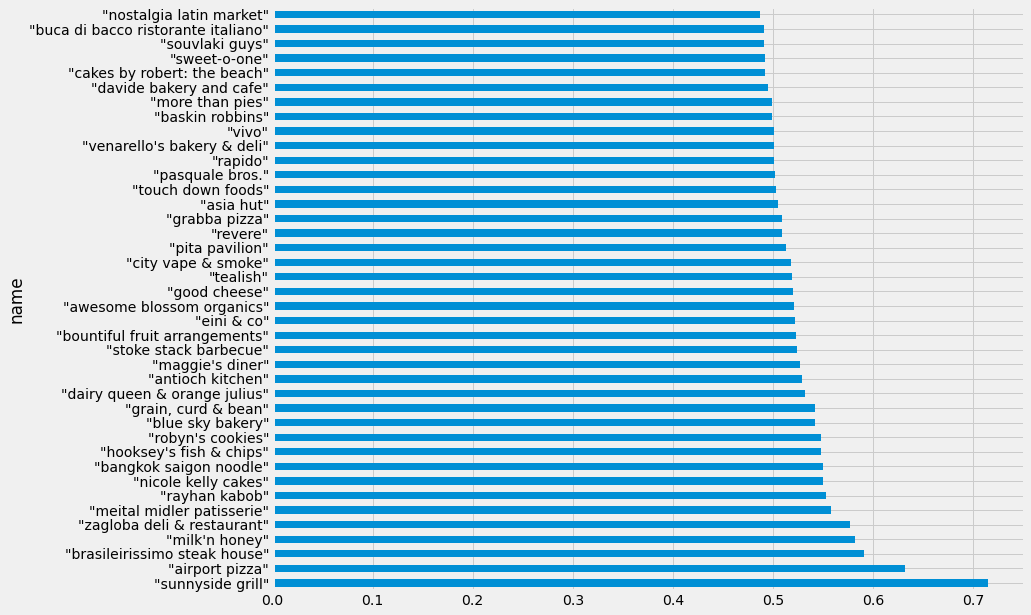

In [ ]:
top.head(40).plot(kind='barh',figsize=(12, 10))
plt.yticks(fontsize=18)
plt.title('Top best restaurants on Yelp',fontsize=20)
plt.ylabel('Restaurants names', fontsize=28)
plt.xlabel('Ratings', fontsize=28)
plt.show()

#### Wordcloud for the restaurant categories to know the most frequently used words in the reviews.

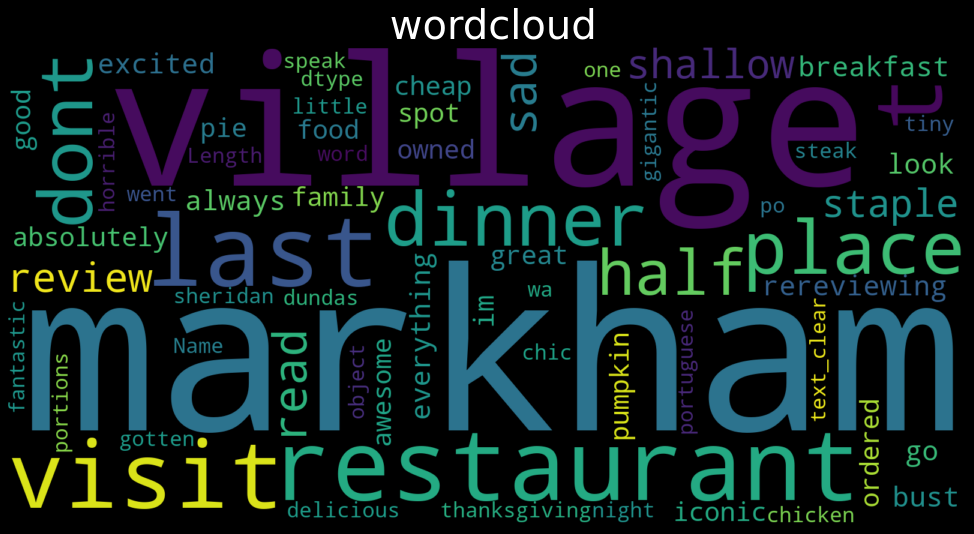

In [ ]:
# difine wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width=1600, height=800, random_state=1, max_words=200000000)
# generate word cloud using df_yelp_tip_top['text_clear']
wc.generate(str(foodon_reviews_2['text_clear']))
# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')
# add title to the graph
plt.title(" wordcloud", fontsize=40,color='white')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=10)
# after lot of congiguration finally plot the graph
plt.show()

## Indexer - Cuisine : business_ids

In [ ]:
sentimean = pd.read_csv("csv/sentimean.csv")
bu1=pd.read_csv('csv/bu_new1.csv')
bu1.drop('Unnamed: 0',axis=1,inplace= True)


In [ ]:
sentinp = sentimean.to_numpy()

In [ ]:
bussNP = bu1.to_numpy()

In [ ]:
sentinp.shape

(12768, 2)

In [ ]:
bussNP.shape

(146702, 13)

In [ ]:
sentidict = dict(zip(sentinp[:,0],sentinp[:,1]))
sentidict

{'FduOLezzT4jWWArKcJ3K0w': -0.4809523809523809,
 '56JttKUf9JnvTw4F1Dog8Q': -0.3492517006802721,
 'gNwsaFJARMHuuYT3llIyDw': -0.3433730158730159,
 '8g8M-xvViH98Sooxi-X1uw': -0.3428888888888889,
 'IyrwvRwiwsKCiiKoxbHeFA': -0.34269179894179896,
 'L7fpE0LYFKS26mcsZvgrXw': -0.3362528796739322,
 'F2ms2jtu6rmgtCNytJ0rkg': -0.3303571428571429,
 '19VNsxhnPZ11zc0KBauonQ': -0.3238095238095238,
 's3h1ha3-uC21YfffQvjhNQ': -0.3232426303854875,
 'k_GZE3AvfeBXp4jqUIe5vw': -0.32266273849607185,
 'nzUv52JpOQz98Fk9GB4AKA': -0.31815476190476194,
 'o0KOUmLUIUh5nuAlGXcsGA': -0.3171296296296296,
 'ZhNikEA0QViGCUjyzwfhLw': -0.3136904761904762,
 '6O6brIANtDgUlex_HdWJ7g': -0.298062558356676,
 'NmbIiYupGuXAXeoUTvKHtw': -0.294462481962482,
 'MMsTJSbdACxBAfaQdLQCVw': -0.2927046614100185,
 'T2EyxkHr4HAmruwa5XM6CA': -0.2810177669552669,
 'CyQXHdumQvxKAkXglORTdQ': -0.2752967171717172,
 'Ue2H-ajY-uBKwGoBDQutCA': -0.2624310064935065,
 'MqT4cWU_BHBm0kpxqyMg0w': -0.2616534391534392,
 '-2ynmEkOCP4Qg39E0O1Ruw': -0.253037037

In [ ]:
sentdic = {lst[0]:lst[1] for lst in sentinp}

In [ ]:
filtered_businesses = {}

for buss in bussNP:
    if buss[0] in sentdic:
    filtered_businesses[buss[0]] = buss

In [ ]:
test = filtered_businesses['ZDx7kt4aOPTlmYTqXDrTGA']
test

array(['ZDx7kt4aOPTlmYTqXDrTGA', '"Canbe Foods"', nan,
       '"336 Rossland Avenue"', 'Ajax', 'ON', 'L1Z 0L9',
       43.88250170000001, -79.0181869, 4.0, 11, 1,
       'Restaurants;Sri Lankan;Indian'], dtype=object)

In [ ]:
categories  = set()

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
lemmatizer = WordNetLemmatizer()
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

In [ ]:
def get_cats(ss):
    cats = []
    for i in range(len(ss)):
        w = ss[i].strip().lower()
        w = lemmatizer.lemmatize(w)
        for ele in w:
            if ele in punc:
                w = w.replace(ele, "")
    cats.append(w)
    return cats

In [ ]:
for key,value in enumerate(filtered_businesses): 
    cats = get_cats(filtered_businesses[value][12].split(';'))
    for c in cats:
        categories.add(c)

In [ ]:
def get_lis(bss):
    cc = dict()
    for key,value in enumerate(filtered_businesses): 
        cats = get_cats(filtered_businesses[value][12].split(';'))
        for c in cats:
            if c in cc:
                cc[c]+=1
            else:
                cc[c] = 1
    return dict(sorted(cc.items(), key=lambda item: item[1]))

In [ ]:
sortd = get_lis(filtered_businesses)

In [ ]:
cuisines = 'chinese', 'italian', 'canadian new', 'american traditional', 'japanese', 'indian','mediterranean','middle eastern', 'thai', 'asian fusion', 'mexican', 'vietnamese', 'korean', 'caribbean','pakistani', 'american new', 'french', 'portuguese', 'latin american', 'persianiranian','taiwanese', 'filipino', 'afghan','british'

In [ ]:
counts = []
for cuis in cuisines:
    print(cuis,sortd[cuis])
    counts.append(sortd[cuis])

chinese 360
italian 236
canadian new 182
american traditional 130
japanese 179
indian 151
mediterranean 102
middle eastern 89
thai 122
asian fusion 81
mexican 101
vietnamese 101
korean 81
caribbean 98
pakistani 32
american new 33
french 31
portuguese 32
latin american 21
persianiranian 19
taiwanese 11
filipino 19
afghan 15
british 11


In [ ]:
raw_dict = {'cuisine':list(cuisines),'count':counts}

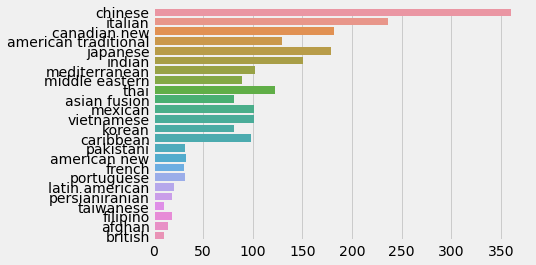

In [ ]:
sns.barplot(y='cuisine', x='count', data=raw_dict,orient='h')

In [ ]:
def create_index(data):
    indx= {cus:[] for cus in cuisines}
    for key,value in enumerate(data):
        cats = get_cats(data[value][12].split(';'))
        for cat in cats:
            if cat in indx:
                indx[cat].append(value)
    for c in indx.keys():
        indx[c] = sorted(indx[c], key=lambda x:sentidict[x])
        indx[c] = indx[c][::-1]
        print(c,indx[c])
    return indx

In [ ]:
indexer = create_index(filtered_businesses)

chinese ['CMN2zW7c5bdXT_esaKm_YA', 'El6TCImlUAnmDFp3U685eQ', 'ybKhwymik8zofQTJnhGifw', 'X6rz732Av_276Dn06dOx9g', 'zd6mwM53f1E5OG4sPzP74Q', '7ZQf0Hi8QpOCd8JUhQ7vnA', 'cFoVNSXvCtqRXkQyEXfx-w', 'jYlRRE2Jbjmaio-Gdpizew', 'uJEot284h2qJbrWOgfAG5w', 's3Y5_k8vGnWfXjGwke89XA', 'L3e0ZBj7zDSYMNaj0LATkA', '_W1ke2wRSE058_IjH2aARA', 'Iov02yUKZVj-Z3A3u37ExA', 'SeGmGvFWi58zGOq1O4953Q', '_xpHdMJXFlUhJyTZ8cKYTg', '26Kt6gQRF7S6m7crwR0tjw', 'Cbvx1IxPniwo_Ybk4CdIBQ', 'w1ogNJp6Iw8K2lDvxLLX0A', 'YE1x0KHgcyVc0BNDG861tA', 'LB7r3hZmb4NXb2jDQmmQ9w', 'IK05Hv0FMQq0pbe_lq6_Zw', '6q09DlOAVmOZRVSD9uMpVA', 'wgYK6zF0M_o01d-32W-S2A', '_5XClj4E5VCIsEscbrrPKg', 'WKayXylpXcAEReoqgNK3tA', 'WNk2OoZAgtlOJ_jj_4hldg', 'b7wUWVV01xaa7E0FUNMDiw', '3Kx4IdA-knGK-9QrGtGl2w', 'nTQhgQZa7HhIpyM0ICC1mw', 'yefjEAyoNfHj43tz_5hhHQ', 'qGLEE1yA1bK0YdlGI-S39A', 'DZtCOjxk8o3spThN215Gbg', 'mevOvXMnlTLbSl4w8fcG2A', '9iJMGMsTK-q6W5MB1_Ny3Q', '6hkHrWb82XfJdZ-SJmCKCg', 'QaxDKkqYTtVYZJcqBNTnvQ', 'Nnr0kZIVlW5sWInOJW9LMQ', 'zUSmxRfIcuTGSR630qv9zQ', '7z

In [ ]:
with open('indexer1.json', "w") as outfile:
    json.dump(indexer, outfile)

## Finding the best restaurants for particular cuisines.

### 1. Indian Cuisine

In [ ]:
goodfood.loc[(goodfood['category1'].isin(indian))]

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,...,category2,category3,category4,category5,category6,category7,category8,category9,category10,senti_polarity
73,-JDAieYuZocQSVYGqwWKog,"""incredible india""",NaN,"""10635 bramalea road, unit j7""",brampton,on,L6R 3P4,43.756045,-79.759043,4.0,...,restaurants,none,none,none,none,none,none,none,none,0.040536
215,YLeAUkFFJri_21uTkyrVFg,"""malaysian garam masala""",scarborough,"""4900-5000 finch avenue e""",toronto,on,M1S 4K4,43.808951,-79.263631,4.0,...,food,restaurants,malaysian,none,none,none,none,none,none,0.182647
263,QEqMHowTTj5GKvpiKheGlQ,"""baba dhaba""",NaN,"""255 rutherford road s""",brampton,on,L6W 4N7,43.688185,-79.728971,4.5,...,restaurants,italian,none,none,none,none,none,none,none,0.304435
277,-XNodvHlq9oDu-kQBwGFkg,"""patiala house""",NaN,"""305 royal west dr""",brampton,on,L6X 5K8,43.659763,-79.814678,4.0,...,restaurants,none,none,none,none,none,none,none,none,0.262292
1161,tVPF1qCLivoxX33pIV5IOQ,"""chimney fresh""",meadowvale village,"""12-6980 maritz drive""",mississauga,on,L5W 1Z3,43.643052,-79.708265,4.5,...,restaurants,none,none,none,none,none,none,none,none,0.087122
1865,U5rfxvnZUupaWT_SgIV79g,"""masala mahal""",brown's corners,"""3255 highway 7 e""",markham,on,L3R 3P9,43.849850,-79.347669,4.0,...,restaurants,canadian (new),none,none,none,none,none,none,none,0.247868
1871,2GRrUI6Vpkpe4M1NA76NWw,"""india bazaar sweets""",NaN,"""10405 kennedy road n""",brampton,on,L6Z 4N7,43.722724,-79.785883,4.5,...,buffets,restaurants,none,none,none,none,none,none,none,0.321141
2335,g29Wq8-qWAQok49AQO2WqQ,"""bukhara grill""",swansea,"""2241a bloor street w""",toronto,on,M6S 1N7,43.650842,-79.477041,4.0,...,restaurants,none,none,none,none,none,none,none,none,0.286404
2900,CtE5hqCQ-HKHwxAKxKH0gg,"""indian crown""",NaN,"""4750 yonge st, unit 144""",toronto,on,M2N 5M6,43.760343,-79.411987,4.0,...,restaurants,none,none,none,none,none,none,none,none,0.177902
3324,xMhpJZaj4QT1Soh76-E2CA,"""feast of dilli""",etobicoke,"""378 browns line""",toronto,on,M8W 3T7,43.600725,-79.544793,4.5,...,pakistani,restaurants,none,none,none,none,none,none,none,0.311451


In [ ]:
foodon_in = goodfood.loc[(goodfood['category1'].isin(indian)) | (goodfood['category2'].isin(indian)) | (goodfood['category3'].isin(indian)) | (goodfood['category4'].isin(indian)) | (goodfood['category5'].isin(indian)) | (goodfood['category6'].isin(indian)) | (goodfood['category7'].isin(indian)) | (goodfood['category8'].isin(indian)) | (goodfood['category9'].isin(indian)) | (goodfood['category10'].isin(indian))]
foodon_in

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,...,category2,category3,category4,category5,category6,category7,category8,category9,category10,senti_polarity
73,-JDAieYuZocQSVYGqwWKog,"""incredible india""",NaN,"""10635 bramalea road, unit j7""",brampton,on,L6R 3P4,43.756045,-79.759043,4.0,...,restaurants,none,none,none,none,none,none,none,none,0.040536
115,0Hy2VE9tqTo4QbovMz3xrQ,"""masala kitchen""",NaN,"""1871 o'connor drive""",toronto,on,M4A 1X1,43.722188,-79.303236,4.0,...,indian,none,none,none,none,none,none,none,none,0.161692
138,KeQ1cK564cL5C_hBTFrqnA,"""desi bar & grill""",mississauga valley,"""925 rathburn road e""",mississauga,on,L4W 4C3,43.616083,-79.617576,4.0,...,pubs,pakistani,event planning & services,djs,canadian (new),halal,indian,delis,restaurants,0.253697
171,4ritTGFnNxmKnKm-UX3kPQ,"""punjabi dhaba""",old malton village,"""2855 derry road e""",mississauga,on,L4T 1A6,43.702235,-79.644586,4.0,...,ethnic food,indian,food trucks,specialty food,food,none,none,none,none,0.285507
215,YLeAUkFFJri_21uTkyrVFg,"""malaysian garam masala""",scarborough,"""4900-5000 finch avenue e""",toronto,on,M1S 4K4,43.808951,-79.263631,4.0,...,food,restaurants,malaysian,none,none,none,none,none,none,0.182647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12588,8PZGCtgG5MZKvz9i3B9gCA,"""eastern twist""",casa loma,"""505 st clair avenue w""",toronto,on,M6C 1A1,43.682940,-79.418491,4.5,...,pakistani,indian,none,none,none,none,none,none,none,0.215117
12621,0v8icS8wOOgEDiHDCOQkZQ,"""chilli chicken house""",NaN,"""4040 creditview road, unit 25""",mississauga,on,L5C,43.568192,-79.666453,4.0,...,chinese,indian,none,none,none,none,none,none,none,0.212567
12662,j4ytRzcmtU4cLMBrhY7jMA,"""annalakshmi""",NaN,"""10086 hurontario street""",brampton,on,L6P 0A1,43.707333,-79.789751,4.0,...,vegetarian,restaurants,none,none,none,none,none,none,none,0.389809
12677,2xw-Ksu9b2jDYlZaApXcBA,"""indian roti house""",harbourfront,"""256 queens quay w""",toronto,on,M5J 1B5,43.639414,-79.385503,4.0,...,restaurants,none,none,none,none,none,none,none,none,0.174508


In [ ]:
f1 = foodon_in[['name', 'stars']].astype(str).apply(lambda x: '->  Rating: '.join(x), axis=1).tolist()
f1

['"incredible india"->  Rating: 4.0',
 '"masala kitchen"->  Rating: 4.0',
 '"desi bar & grill"->  Rating: 4.0',
 '"punjabi dhaba"->  Rating: 4.0',
 '"malaysian garam masala"->  Rating: 4.0',
 '"himalayan kitchen"->  Rating: 4.5',
 '"baba dhaba"->  Rating: 4.5',
 '"patiala house"->  Rating: 4.0',
 '"nirala sweets & restaurant"->  Rating: 4.0',
 '"desi spice"->  Rating: 4.5',
 '"chat hut"->  Rating: 4.5',
 '"guru lukshmi"->  Rating: 4.0',
 '"babu catering & take out"->  Rating: 4.0',
 '"canbe foods"->  Rating: 4.0',
 '"hakka no 1 restaurant"->  Rating: 4.0',
 '"istar restaurant"->  Rating: 4.5',
 '"samosa and sweet factory"->  Rating: 4.0',
 '"chimney fresh"->  Rating: 4.5',
 '"samosa king - embassy restaurant"->  Rating: 4.0',
 '"bhaijaanz grill restaurant"->  Rating: 4.0',
 '"sher-e-punjab"->  Rating: 4.0',
 '"bhai\'s indian canteen"->  Rating: 4.0',
 '"anantha bhavan takeout & catering"->  Rating: 4.0',
 '"cuisine of india"->  Rating: 5.0',
 '"bangali sweet house"->  Rating: 4.5',
 '"

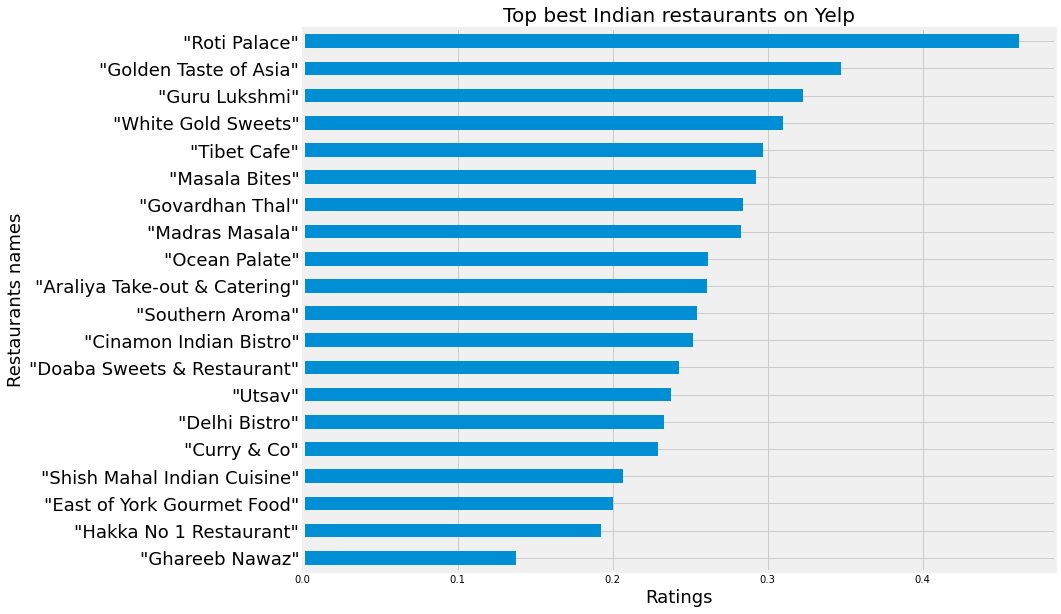

In [ ]:
top_restaurants = foodon_in.business_id.value_counts().index[:20].tolist()
review_top = foodon_in.loc[foodon_in['business_id'].isin(top_restaurants)]
review_top.groupby(review_top.name)['senti_polarity'].mean().sort_values(ascending=True).plot(kind='barh',figsize=(12, 10))
plt.yticks(fontsize=18)
plt.title('Top best Indian restaurants on Yelp',fontsize=20)
plt.ylabel('Restaurants names', fontsize=18)
plt.xlabel('Ratings', fontsize=18)
plt.show()

### Roti Palace is the best indian restaurant

### 2. Italisan Cuisine

In [ ]:
foodon_it = goodfood.loc[(goodfood['category1'].isin(italian)) | (goodfood['category2'].isin(italian)) | (goodfood['category3'].isin(italian)) | (goodfood['category4'].isin(italian)) | (goodfood['category5'].isin(italian)) | (goodfood['category6'].isin(italian)) | (goodfood['category7'].isin(italian)) | (goodfood['category8'].isin(italian)) | (goodfood['category9'].isin(italian)) | (goodfood['category10'].isin(italian))]
foodon_it 

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,...,category2,category3,category4,category5,category6,category7,category8,category9,category10,senti_polarity
12,gIVjdDWRnS1yDVpPF3oUeg,"""pizza pizza""",milliken,"""7665 kennedy road""",markham,on,L3R 0L7,43.841217,-79.303936,4.0,...,chicken wings,fast food,restaurants,pizza,none,none,none,none,none,0.250655
17,5GAXZ7gJ81TSR0-Q6AMp_A,"""via panini""",edgeley,"""90 edgeley boulevard""",vaughan,on,L4K 5C7,43.796460,-79.533205,4.0,...,restaurants,none,none,none,none,none,none,none,none,0.258623
46,VaFRggkuU-gZDMbnvAZOtg,"""piazza bistro""",NaN,"""94 george street""",oakville,on,L6J 3B7,43.445690,-79.668201,4.0,...,restaurants,none,none,none,none,none,none,none,none,0.212479
196,eH96MBK-EAcC0Q-lYqIb8Q,"""bravo bistro""",NaN,"""2560 matheson boulevard e""",mississauga,on,L4W 4Y9,43.659226,-79.603533,4.5,...,restaurants,italian,cafes,modern european,none,none,none,none,none,0.346260
226,_4noxz6NM0gBeVhZ58Emtg,"""lamanna's bakery""",scarborough,"""6758 kingston road""",scarborough,on,M1B 1G8,43.798185,-79.148237,4.0,...,restaurants,food,italian,desserts,none,none,none,none,none,0.296518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,9Jn6MJZMz2R6rcszqmXDqg,"""luci restaurant""",etobicoke,"""664 the queensway""",toronto,on,M8Y 1K6,43.627504,-79.498339,4.0,...,restaurants,none,none,none,none,none,none,none,none,0.347964
12521,zmfa8RNxqSuOJ9Nx-CMs_Q,"""positano restaurant""",mount pleasant and davisville,"""633 mount pleasant road""",toronto,on,M4S 2M9,43.704703,-79.388532,4.0,...,pizza,italian,none,none,none,none,none,none,none,0.356067
12527,E2e0ddxVL_G0EzsJaFVQKA,"""ristorante gravina""",NaN,"""10385 weston road""",vaughan,on,L4L 2V5,43.855086,-79.562401,4.0,...,restaurants,none,none,none,none,none,none,none,none,0.289925
12705,OIdOJaNS8M624F58XGV3PQ,"""pizzeria libretto danforth""",greektown,"""550 danforth avenue""",toronto,on,M4K 1P7,43.678554,-79.347584,4.0,...,pizza,italian,none,none,none,none,none,none,none,0.306233


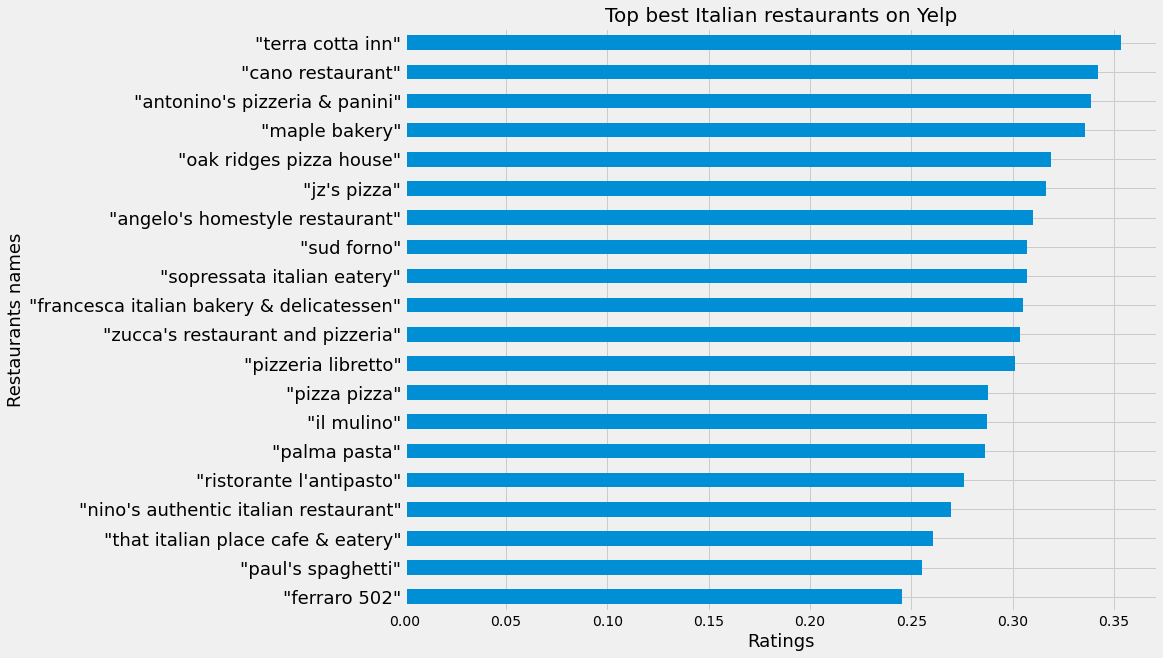

In [ ]:
top_restaurants = foodon_it.business_id.value_counts().index[:20].tolist()
review_top = foodon_it.loc[foodon_it['business_id'].isin(top_restaurants)]
review_top.groupby(review_top.name)['senti_polarity'].mean().sort_values(ascending=True).plot(kind='barh',figsize=(12, 10))
plt.yticks(fontsize=18)
plt.title('Top best Italian restaurants on Yelp',fontsize=20)
plt.ylabel('Restaurants names', fontsize=18)
plt.xlabel('Ratings', fontsize=18)
plt.show()

In [ ]:
goodfood= pd.read_csv("csv/goodfood.csv")
goodfood.drop(goodfood.columns[[0]], axis=1, inplace=True)
# goodfood.drop(goodfood.columns[[0,1,16,17,19]], axis=1, inplace=True)
# goodfood.RestaurantsPriceRange2.replace([1.0, 2.0, 3.0, 4.0, 5.0], ['$','$$','$$$','$$$$','$$$$$'], inplace=True)
goodfood.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,...,category2,category3,category4,category5,category6,category7,category8,category9,category10,senti_polarity
0,xcgFnd-MwkZeO5G2HQ0gAQ,"""t & t bakery and cafe""",markham village,"""35 main street n""",markham,on,L3P 1X3,43.875177,-79.260153,4.0,...,bagels,food,none,none,none,none,none,none,none,0.273081
1,lHYiCS-y8AFjUitv6MGpxg,"""starbucks""",liberty village,"""85 hanna avenue""",toronto,on,M6K 3S3,43.639863,-79.419533,4.0,...,coffee & tea,none,none,none,none,none,none,none,none,0.303710
2,AtdXq_gu9NTE5rx4ct_dGg,"""davidstea""",ryerson,"""10 dundas street e""",toronto,on,M5B 2G9,43.656729,-79.380718,4.0,...,food,tea rooms,none,none,none,none,none,none,none,0.196952
3,nbhBRhZtdaZmMMeb2i02pg,"""sunnyside grill""",NaN,"""2777 steeles avenue w""",toronto,on,M3J 3K5,43.781816,-79.490433,5.0,...,breakfast & brunch,none,none,none,none,none,none,none,none,0.715370
4,FXHfcFVEfI1vVngW2gVOpw,"""bampot house of tea & board games""",NaN,"""201 harbord street""",toronto,on,M5S 1H6,43.661582,-79.408878,4.0,...,restaurants,food,mediterranean,tea rooms,none,none,none,none,none,0.254588


In [ ]:
goodfood.columns

Index(['business_id', 'name', 'neighborhood', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars', 'review_count',
       'is_open', 'category1', 'category2', 'category3', 'category4',
       'category5', 'category6', 'category7', 'category8', 'category9',
       'category10', 'senti_polarity'],
      dtype='object')

## TOP 10 Restaurants based on the cuisine selected in Ontorio

#### Input the name of the cuisine :

In [7]:
cuisinelist=['Indian','Mexican','Thai','Japanese','Italian','American (traditional)', 'American (new)', 'pakistani', 'Middle eastern','Chinese', 'Canadian (new)','Hungarian','German','Vietnamese']

for i in range(1, len(cuisinelist)+1):
    print(str(i)+".",cuisinelist[i-1])

1. Indian
2. Mexican
3. Thai
4. Japanese
5. Italian
6. American (traditional)
7. American (new)
8. pakistani
9. Middle eastern
10. Chinese
11. Canadian (new)
12. Hungarian
13. German
14. Vietnamese


In [8]:
cuisine=int(input("Enter Cuisine Number: "))
cuisine = cuisinelist[cuisine-1].lower()

print("You have selected " + cuisine)

Enter Cuisine Number: 3
You have selected thai


#### Read indexer

In [5]:
import json

f = open ('indexer.json', "r")
 
# Reading from file
indexer = json.loads(f.read())

#### Get top 10 restaurants based on the cuisine enetered by the user

In [9]:
ids = indexer[cuisine][:10]

In [3]:
goodfood= pd.read_csv("csv/goodfood.csv")
goodfood.drop(goodfood.columns[[0]], axis=1, inplace=True)
goodfood.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,senti_polarity
0,xcgFnd-MwkZeO5G2HQ0gAQ,"""t & t bakery and cafe""",markham village,"""35 main street n""",markham,on,L3P 1X3,43.875177,-79.260153,4.0,38,1,bakeries,bagels,food,none,none,none,none,none,none,none,0.273081
1,lHYiCS-y8AFjUitv6MGpxg,"""starbucks""",liberty village,"""85 hanna avenue""",toronto,on,M6K 3S3,43.639863,-79.419533,4.0,21,1,food,coffee & tea,none,none,none,none,none,none,none,none,0.303710
2,AtdXq_gu9NTE5rx4ct_dGg,"""davidstea""",ryerson,"""10 dundas street e""",toronto,on,M5B 2G9,43.656729,-79.380718,4.0,6,1,coffee & tea,food,tea rooms,none,none,none,none,none,none,none,0.196952
3,nbhBRhZtdaZmMMeb2i02pg,"""sunnyside grill""",NaN,"""2777 steeles avenue w""",toronto,on,M3J 3K5,43.781816,-79.490433,5.0,3,1,restaurants,breakfast & brunch,none,none,none,none,none,none,none,none,0.715370
4,FXHfcFVEfI1vVngW2gVOpw,"""bampot house of tea & board games""",NaN,"""201 harbord street""",toronto,on,M5S 1H6,43.661582,-79.408878,4.0,55,1,coffee & tea,restaurants,food,mediterranean,tea rooms,none,none,none,none,none,0.254588


In [10]:
goodfood[goodfood['business_id'].isin(ids)][['name', 'address', 'city', 'state','senti_polarity']].sort_values('senti_polarity', axis=0, ascending=False)

,name,address,city,state,senti_polarity
100,"""bangkok saigon noodle""","""136 holland street e, unit 1""",bradford,on,0.550298
4635,"""thai wok n roll""","""30 broadleaf ave""",whitby,on,0.480556
3881,"""thai cuisine experts""","""6970 lisgar drive, unit 2a""",mississauga,on,0.416845
3902,"""bolton thai cuisine""","""18 king street e, unit l5""",caledon,on,0.396744
1887,"""feng wok 'n' roll""","""28 dundas street e, unit 4""",mississauga,on,0.383282
4549,"""thai express""","""178-200 windflower gate""",vaughan,on,0.378685
2766,"""silk restaurant""","""446 parliament street""",toronto,on,0.359119
1530,"""pho tai loi""","""1550 s gateway road, suite 1b""",mississauga,on,0.359035
538,"""river tai restaurant""","""92 harbord street""",toronto,on,0.358654
4234,"""bach yen""","""738 gerrard street e""",toronto,on,0.343499
